In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Prakasam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
2556,2559,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.31,0.11,0.20,...,0.63,1.96,0.62,8.60,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2557,2560,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.65,0.08,0.12,...,0.52,15.92,0.60,2.48,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2558,2561,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.74,0.05,0.13,...,0.46,10.92,0.66,15.36,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2559,2562,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.31,0.03,0.16,...,0.44,7.72,0.62,16.22,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2560,2563,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.60,0.09,0.09,...,0.49,0.92,0.28,4.76,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.689732,0.334247,0.367505,12.356082,201.072165,1851.701031,413.552577,18.865711,0.530144,1.198804,10.746969,1.190186,11.690330,0.020769
std,1.100884,1.313235,0.275873,10.092348,172.494236,1443.287141,372.891704,58.008623,0.570159,1.293075,10.337956,0.691945,5.422488,0.045312
min,4.650000,0.010000,0.010000,1.030000,22.000000,67.000000,17.000000,0.850000,0.030000,0.100000,0.040000,0.060000,0.010000,0.010877
25%,6.800000,0.070000,0.160000,5.500000,99.000000,485.000000,118.000000,2.670000,0.270000,0.400000,3.840000,0.670000,8.100000,0.011916
50%,8.180000,0.140000,0.310000,9.470000,148.000000,1776.000000,296.000000,5.040000,0.380000,0.770000,6.650000,1.040000,10.770000,0.012701
75%,8.520000,0.260000,0.490000,16.380000,235.000000,2846.000000,610.000000,13.970000,0.590000,1.510000,14.860000,1.580000,14.040000,0.013254
max,9.600000,25.200000,1.940000,83.720000,1529.000000,6745.000000,2017.000000,1015.650000,8.790000,11.850000,73.160000,4.510000,39.840000,0.341106


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'Paddy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df = df[df['SoilType'] != 'Paddy']
df.SoilType.unique()

array(['Red Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 402, 'Black Soil': 82}

<BarContainer object of 2 artists>

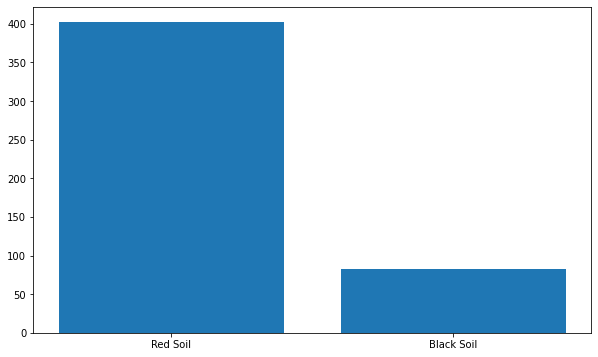

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Cowpea', 'Paddy', 'Pigeonpea', 'Green gram', 'Cow pea',
       'Tobacco', 'Maize', 'Blackgram', 'Chilli', 'Prawns', 'chickpea'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Cowpea        201
Cotton         87
Paddy          82
Pigeonpea      45
Tobacco        33
Blackgram      11
Maize          10
chickpea        5
Prawns          3
Green gram      3
Chilli          2
Cow pea         2
Name: Crop, dtype: int64

CowPea    203
Cotton     87
Paddy      82
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

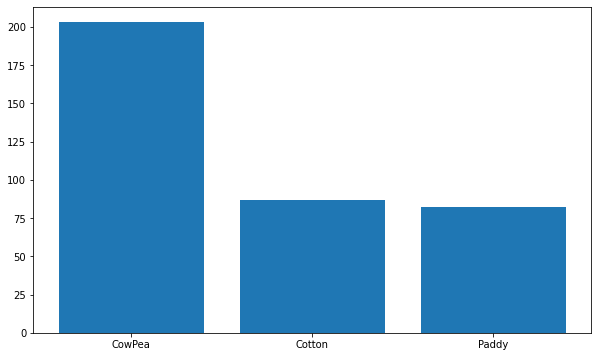

In [15]:
df['Crop'] = df['Crop'].replace('Pigeonpea', 'PigeonPea')
df['Crop'] = df['Crop'].replace(['Cow pea', 'Cowpea'], 'CowPea')
df = df[(df['Crop'] != 'Prawns') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Green gram') & (df['Crop'] != 'chickpea') & (df['Crop'] != 'Maize') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'PigeonPea')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
pH,1.000000,0.225520,0.627646,0.145641,0.349761,0.710387,0.644894,0.306670,0.121496,0.562174,0.048194,0.365111,-0.196076,0.079168
EC,0.225520,1.000000,0.180770,0.106842,0.269661,0.134513,0.266220,0.883446,0.047044,0.671055,0.084508,0.143672,-0.001015,0.077390
OC,0.627646,0.180770,1.000000,0.347283,0.473994,0.553400,0.684945,0.280316,0.255104,0.634237,0.276063,0.522492,0.112950,-0.009287
P,0.145641,0.106842,0.347283,1.000000,0.496825,0.023922,0.320879,0.213843,0.198732,0.353209,0.439109,0.357966,0.056772,-0.011604
K,0.349761,0.269661,0.473994,0.496825,1.000000,0.147653,0.296714,0.273834,0.129357,0.456390,0.101086,0.301687,0.089939,-0.030882
Ca,0.710387,0.134513,0.553400,0.023922,0.147653,1.000000,0.659068,0.243673,0.036824,0.371171,0.096660,0.403835,0.007595,0.067746
Mg,0.644894,0.266220,0.684945,0.320879,0.296714,0.659068,1.000000,0.468273,0.143484,0.647208,0.458539,0.718345,0.050831,0.031722
S,0.306670,0.883446,0.280316,0.213843,0.273834,0.243673,0.468273,1.000000,0.098609,0.752408,0.276360,0.336935,0.016358,0.119671
Zn,0.121496,0.047044,0.255104,0.198732,0.129357,0.036824,0.143484,0.098609,1.000000,0.191370,0.127318,0.272886,0.083235,0.059669
B,0.562174,0.671055,0.634237,0.353209,0.456390,0.371171,0.647208,0.752408,0.191370,1.000000,0.284794,0.454291,-0.028914,0.017403


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Zn', 'Fe', 'Mn', 'NDVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC      P      K    Zn    Fe   Mn      NDVI  Black Soil  \
2556  8.31  0.11  10.71  118.0  0.76  1.96  8.6  0.011788           0   

      Red Soil  
2556         1  
2556    Cotton
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7189542483660131


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.03 %
Standard Deviation: 6.16 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.38 %
Standard Deviation: 4.66 %


# Random Forest Classifier

In [35]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8169934640522876


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.52 %
Standard Deviation: 3.91 %


In [39]:
pickle.dump(clf3_3, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# XGBoost

In [40]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.803921568627451


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.63 %
Standard Deviation: 6.96 %


In [45]:
pickle.dump(clf4_4, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [46]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [47]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7412280701754386
Testing Accuracy:  0.6470588235294118


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 64.88 %
Standard Deviation: 4.93 %


# Catboost

In [50]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8742236	total: 150ms	remaining: 14.8s
1:	learn: 0.8090978	total: 153ms	remaining: 7.51s
2:	learn: 0.7388034	total: 156ms	remaining: 5.04s
3:	learn: 0.7156097	total: 158ms	remaining: 3.8s
4:	learn: 0.6798157	total: 161ms	remaining: 3.05s
5:	learn: 0.6502731	total: 163ms	remaining: 2.55s
6:	learn: 0.6237517	total: 165ms	remaining: 2.19s
7:	learn: 0.6130023	total: 167ms	remaining: 1.92s
8:	learn: 0.5785210	total: 169ms	remaining: 1.71s
9:	learn: 0.5587307	total: 171ms	remaining: 1.54s
10:	learn: 0.5367755	total: 173ms	remaining: 1.4s
11:	learn: 0.5278749	total: 175ms	remaining: 1.28s
12:	learn: 0.5172529	total: 177ms	remaining: 1.19s
13:	learn: 0.5009492	total: 179ms	remaining: 1.1s
14:	learn: 0.4793866	total: 182ms	remaining: 1.03s
15:	learn: 0.4632819	total: 184ms	remaining: 965ms
16:	learn: 0.4597372	total: 186ms	remaining: 907ms
17:	learn: 0.4516219	total: 187ms	remaining: 853ms
18:	learn: 0.4464579	total: 189ms	remaining: 805ms
19:	learn: 0.4347551	total: 190ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7825690319
bestIteration = 98

Training on fold [1/5]

bestTest = 0.7238289828
bestIteration = 99

Training on fold [2/5]

bestTest = 0.7949266323
bestIteration = 99

Training on fold [3/5]

bestTest = 0.757649556
bestIteration = 99

Training on fold [4/5]

bestTest = 0.7612688156
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0801905	test: 1.0819912	best: 1.0819912 (0)	total: 2.09ms	remaining: 2.09s
1:	learn: 1.0651263	test: 1.0689131	best: 1.0689131 (1)	total: 4.51ms	remaining: 2.25s
2:	learn: 1.0540851	test: 1.0623358	best: 1.0623358 (2)	total: 6.49ms	remaining: 2.15s
3:	learn: 1.0406607	test: 1.0516378	best: 1.0516378 (3)	total: 8.19ms	remaining: 2.04s
4:	learn: 1.0254300	test: 1.0405446	best: 1.0405446 (4)	total: 9.85ms	remaining: 1.96s
5:	learn: 1.0114819	test: 1.0283891	best: 1.0283891 (5)	total: 11.5ms	remaining: 1.9s
6:	learn: 1.0001228	test: 1.0197322	best: 1.0197322 (6)	total: 13ms	remaining: 1.85s
7:	learn: 0.9890299	test: 1.0087291	best: 1.0087291 (7)	total: 14.6ms	remaining: 1.81s
8:	learn: 0.9775339	test: 0.9988884	best: 0.9988884 (8)	total: 16.2ms	remaining: 1.79s
9:	learn: 0.9653259	test: 0.9881116	best: 0.9881116 (9)	total: 17.8ms	remaining: 1.76s
10:	learn: 0.9582113	test: 0.9821179	best: 0.9821179 (10)	total: 19.4ms	remaining: 1.75s
11:	learn: 0.9465400	test: 0.9721359	best: 0

130:	learn: 0.5500589	test: 0.7185766	best: 0.7185629 (129)	total: 173ms	remaining: 1.15s
131:	learn: 0.5486596	test: 0.7181176	best: 0.7181176 (131)	total: 175ms	remaining: 1.15s
132:	learn: 0.5479817	test: 0.7176153	best: 0.7176153 (132)	total: 177ms	remaining: 1.15s
133:	learn: 0.5459353	test: 0.7170080	best: 0.7170080 (133)	total: 178ms	remaining: 1.15s
134:	learn: 0.5445157	test: 0.7164964	best: 0.7164964 (134)	total: 180ms	remaining: 1.15s
135:	learn: 0.5440070	test: 0.7162958	best: 0.7162958 (135)	total: 181ms	remaining: 1.15s
136:	learn: 0.5428959	test: 0.7156836	best: 0.7156836 (136)	total: 182ms	remaining: 1.15s
137:	learn: 0.5415679	test: 0.7144223	best: 0.7144223 (137)	total: 184ms	remaining: 1.15s
138:	learn: 0.5400922	test: 0.7130059	best: 0.7130059 (138)	total: 185ms	remaining: 1.15s
139:	learn: 0.5388285	test: 0.7129762	best: 0.7129762 (139)	total: 187ms	remaining: 1.15s
140:	learn: 0.5378818	test: 0.7126851	best: 0.7126851 (140)	total: 188ms	remaining: 1.15s
141:	learn

259:	learn: 0.4263015	test: 0.6634450	best: 0.6634450 (259)	total: 347ms	remaining: 989ms
260:	learn: 0.4251982	test: 0.6628750	best: 0.6628750 (260)	total: 349ms	remaining: 989ms
261:	learn: 0.4247605	test: 0.6629496	best: 0.6628750 (260)	total: 351ms	remaining: 989ms
262:	learn: 0.4240679	test: 0.6625409	best: 0.6625409 (262)	total: 352ms	remaining: 988ms
263:	learn: 0.4235013	test: 0.6626588	best: 0.6625409 (262)	total: 354ms	remaining: 986ms
264:	learn: 0.4225828	test: 0.6622738	best: 0.6622738 (264)	total: 355ms	remaining: 985ms
265:	learn: 0.4217493	test: 0.6630665	best: 0.6622738 (264)	total: 356ms	remaining: 983ms
266:	learn: 0.4210156	test: 0.6624521	best: 0.6622738 (264)	total: 357ms	remaining: 981ms
267:	learn: 0.4202336	test: 0.6617561	best: 0.6617561 (267)	total: 358ms	remaining: 979ms
268:	learn: 0.4196922	test: 0.6612652	best: 0.6612652 (268)	total: 360ms	remaining: 978ms
269:	learn: 0.4188656	test: 0.6605528	best: 0.6605528 (269)	total: 361ms	remaining: 977ms
270:	learn

379:	learn: 0.3466670	test: 0.6352779	best: 0.6347293 (377)	total: 522ms	remaining: 852ms
380:	learn: 0.3460672	test: 0.6352248	best: 0.6347293 (377)	total: 524ms	remaining: 851ms
381:	learn: 0.3453783	test: 0.6353259	best: 0.6347293 (377)	total: 526ms	remaining: 850ms
382:	learn: 0.3449184	test: 0.6354544	best: 0.6347293 (377)	total: 527ms	remaining: 849ms
383:	learn: 0.3441970	test: 0.6353035	best: 0.6347293 (377)	total: 528ms	remaining: 847ms
384:	learn: 0.3439335	test: 0.6347400	best: 0.6347293 (377)	total: 530ms	remaining: 846ms
385:	learn: 0.3434263	test: 0.6345430	best: 0.6345430 (385)	total: 531ms	remaining: 844ms
386:	learn: 0.3431200	test: 0.6337830	best: 0.6337830 (386)	total: 532ms	remaining: 843ms
387:	learn: 0.3425240	test: 0.6334494	best: 0.6334494 (387)	total: 533ms	remaining: 841ms
388:	learn: 0.3417821	test: 0.6333544	best: 0.6333544 (388)	total: 535ms	remaining: 840ms
389:	learn: 0.3411875	test: 0.6330014	best: 0.6330014 (389)	total: 536ms	remaining: 839ms
390:	learn

495:	learn: 0.2934797	test: 0.6185553	best: 0.6185553 (495)	total: 688ms	remaining: 699ms
496:	learn: 0.2930642	test: 0.6185038	best: 0.6185038 (496)	total: 690ms	remaining: 698ms
497:	learn: 0.2927378	test: 0.6184843	best: 0.6184843 (497)	total: 692ms	remaining: 697ms
498:	learn: 0.2925246	test: 0.6183214	best: 0.6183214 (498)	total: 693ms	remaining: 696ms
499:	learn: 0.2921944	test: 0.6178822	best: 0.6178822 (499)	total: 695ms	remaining: 695ms
500:	learn: 0.2915032	test: 0.6185566	best: 0.6178822 (499)	total: 696ms	remaining: 693ms
501:	learn: 0.2908913	test: 0.6184629	best: 0.6178822 (499)	total: 697ms	remaining: 692ms
502:	learn: 0.2905184	test: 0.6178718	best: 0.6178718 (502)	total: 699ms	remaining: 690ms
503:	learn: 0.2901428	test: 0.6176227	best: 0.6176227 (503)	total: 700ms	remaining: 689ms
504:	learn: 0.2898531	test: 0.6173597	best: 0.6173597 (504)	total: 702ms	remaining: 688ms
505:	learn: 0.2894084	test: 0.6177901	best: 0.6173597 (504)	total: 704ms	remaining: 687ms
506:	learn

613:	learn: 0.2493946	test: 0.6147597	best: 0.6147597 (613)	total: 865ms	remaining: 544ms
614:	learn: 0.2489054	test: 0.6141236	best: 0.6141236 (614)	total: 867ms	remaining: 543ms
615:	learn: 0.2486900	test: 0.6139931	best: 0.6139931 (615)	total: 869ms	remaining: 542ms
616:	learn: 0.2482566	test: 0.6137117	best: 0.6137117 (616)	total: 870ms	remaining: 540ms
617:	learn: 0.2478758	test: 0.6135057	best: 0.6135057 (617)	total: 872ms	remaining: 539ms
618:	learn: 0.2474299	test: 0.6139475	best: 0.6135057 (617)	total: 873ms	remaining: 538ms
619:	learn: 0.2472495	test: 0.6137228	best: 0.6135057 (617)	total: 875ms	remaining: 536ms
620:	learn: 0.2469023	test: 0.6133759	best: 0.6133759 (620)	total: 876ms	remaining: 535ms
621:	learn: 0.2466106	test: 0.6132438	best: 0.6132438 (621)	total: 877ms	remaining: 533ms
622:	learn: 0.2464036	test: 0.6131985	best: 0.6131985 (622)	total: 878ms	remaining: 531ms
623:	learn: 0.2459947	test: 0.6136153	best: 0.6131985 (622)	total: 879ms	remaining: 530ms
624:	learn

742:	learn: 0.2156232	test: 0.6042410	best: 0.6040656 (740)	total: 1.03s	remaining: 358ms
743:	learn: 0.2153328	test: 0.6042012	best: 0.6040656 (740)	total: 1.04s	remaining: 357ms
744:	learn: 0.2151548	test: 0.6042163	best: 0.6040656 (740)	total: 1.04s	remaining: 355ms
745:	learn: 0.2150904	test: 0.6042095	best: 0.6040656 (740)	total: 1.04s	remaining: 354ms
746:	learn: 0.2147892	test: 0.6043823	best: 0.6040656 (740)	total: 1.04s	remaining: 352ms
747:	learn: 0.2146792	test: 0.6042505	best: 0.6040656 (740)	total: 1.04s	remaining: 351ms
748:	learn: 0.2145706	test: 0.6042934	best: 0.6040656 (740)	total: 1.04s	remaining: 349ms
749:	learn: 0.2143879	test: 0.6046447	best: 0.6040656 (740)	total: 1.04s	remaining: 348ms
750:	learn: 0.2140598	test: 0.6049094	best: 0.6040656 (740)	total: 1.04s	remaining: 346ms
751:	learn: 0.2139318	test: 0.6047243	best: 0.6040656 (740)	total: 1.04s	remaining: 345ms
752:	learn: 0.2136854	test: 0.6045202	best: 0.6040656 (740)	total: 1.05s	remaining: 343ms
753:	learn

882:	learn: 0.1878031	test: 0.6003252	best: 0.5999227 (859)	total: 1.21s	remaining: 161ms
883:	learn: 0.1875357	test: 0.6006444	best: 0.5999227 (859)	total: 1.21s	remaining: 159ms
884:	learn: 0.1873610	test: 0.6003835	best: 0.5999227 (859)	total: 1.22s	remaining: 158ms
885:	learn: 0.1869285	test: 0.6001163	best: 0.5999227 (859)	total: 1.22s	remaining: 157ms
886:	learn: 0.1867119	test: 0.6001222	best: 0.5999227 (859)	total: 1.22s	remaining: 155ms
887:	learn: 0.1865920	test: 0.6000863	best: 0.5999227 (859)	total: 1.22s	remaining: 154ms
888:	learn: 0.1864168	test: 0.6000757	best: 0.5999227 (859)	total: 1.22s	remaining: 152ms
889:	learn: 0.1861922	test: 0.6000681	best: 0.5999227 (859)	total: 1.22s	remaining: 151ms
890:	learn: 0.1859970	test: 0.6004659	best: 0.5999227 (859)	total: 1.22s	remaining: 150ms
891:	learn: 0.1857470	test: 0.6001701	best: 0.5999227 (859)	total: 1.23s	remaining: 148ms
892:	learn: 0.1855364	test: 0.5999130	best: 0.5999130 (892)	total: 1.23s	remaining: 147ms
893:	learn

981:	learn: 0.1702026	test: 0.6003850	best: 0.5996459 (894)	total: 1.38s	remaining: 25.3ms
982:	learn: 0.1701307	test: 0.6004697	best: 0.5996459 (894)	total: 1.38s	remaining: 23.9ms
983:	learn: 0.1699616	test: 0.6002917	best: 0.5996459 (894)	total: 1.39s	remaining: 22.5ms
984:	learn: 0.1698278	test: 0.5999276	best: 0.5996459 (894)	total: 1.39s	remaining: 21.1ms
985:	learn: 0.1696533	test: 0.6000384	best: 0.5996459 (894)	total: 1.39s	remaining: 19.7ms
986:	learn: 0.1695637	test: 0.5999533	best: 0.5996459 (894)	total: 1.39s	remaining: 18.3ms
987:	learn: 0.1694886	test: 0.5998974	best: 0.5996459 (894)	total: 1.39s	remaining: 16.9ms
988:	learn: 0.1693484	test: 0.5997847	best: 0.5996459 (894)	total: 1.4s	remaining: 15.5ms
989:	learn: 0.1691840	test: 0.5992672	best: 0.5992672 (989)	total: 1.4s	remaining: 14.1ms
990:	learn: 0.1688573	test: 0.5988045	best: 0.5988045 (990)	total: 1.4s	remaining: 12.7ms
991:	learn: 0.1687221	test: 0.5989226	best: 0.5988045 (990)	total: 1.4s	remaining: 11.3ms
992

164:	learn: 0.2812971	test: 0.6234846	best: 0.6234846 (164)	total: 309ms	remaining: 1.56s
165:	learn: 0.2796806	test: 0.6223814	best: 0.6223814 (165)	total: 312ms	remaining: 1.56s
166:	learn: 0.2779486	test: 0.6214154	best: 0.6214154 (166)	total: 313ms	remaining: 1.56s
167:	learn: 0.2763358	test: 0.6219411	best: 0.6214154 (166)	total: 315ms	remaining: 1.56s
168:	learn: 0.2746845	test: 0.6231637	best: 0.6214154 (166)	total: 317ms	remaining: 1.56s
169:	learn: 0.2734376	test: 0.6226873	best: 0.6214154 (166)	total: 318ms	remaining: 1.55s
170:	learn: 0.2715831	test: 0.6246426	best: 0.6214154 (166)	total: 320ms	remaining: 1.55s
171:	learn: 0.2706140	test: 0.6233184	best: 0.6214154 (166)	total: 322ms	remaining: 1.55s
172:	learn: 0.2691443	test: 0.6215432	best: 0.6214154 (166)	total: 324ms	remaining: 1.55s
173:	learn: 0.2678399	test: 0.6210869	best: 0.6210869 (173)	total: 326ms	remaining: 1.54s
174:	learn: 0.2663325	test: 0.6197605	best: 0.6197605 (174)	total: 327ms	remaining: 1.54s
175:	learn

262:	learn: 0.1932920	test: 0.6073082	best: 0.6049383 (206)	total: 483ms	remaining: 1.35s
263:	learn: 0.1921355	test: 0.6085077	best: 0.6049383 (206)	total: 485ms	remaining: 1.35s
264:	learn: 0.1918118	test: 0.6081665	best: 0.6049383 (206)	total: 486ms	remaining: 1.35s
265:	learn: 0.1914510	test: 0.6089849	best: 0.6049383 (206)	total: 488ms	remaining: 1.35s
266:	learn: 0.1907557	test: 0.6088669	best: 0.6049383 (206)	total: 490ms	remaining: 1.34s
267:	learn: 0.1902711	test: 0.6096652	best: 0.6049383 (206)	total: 491ms	remaining: 1.34s
268:	learn: 0.1897161	test: 0.6090838	best: 0.6049383 (206)	total: 493ms	remaining: 1.34s
269:	learn: 0.1891950	test: 0.6094512	best: 0.6049383 (206)	total: 495ms	remaining: 1.34s
270:	learn: 0.1884827	test: 0.6099054	best: 0.6049383 (206)	total: 496ms	remaining: 1.33s
271:	learn: 0.1879669	test: 0.6093800	best: 0.6049383 (206)	total: 498ms	remaining: 1.33s
272:	learn: 0.1872674	test: 0.6097945	best: 0.6049383 (206)	total: 500ms	remaining: 1.33s
273:	learn

365:	learn: 0.1409215	test: 0.6040065	best: 0.6006073 (312)	total: 662ms	remaining: 1.15s
366:	learn: 0.1405910	test: 0.6044063	best: 0.6006073 (312)	total: 664ms	remaining: 1.15s
367:	learn: 0.1401301	test: 0.6055402	best: 0.6006073 (312)	total: 666ms	remaining: 1.14s
368:	learn: 0.1399007	test: 0.6051455	best: 0.6006073 (312)	total: 667ms	remaining: 1.14s
369:	learn: 0.1396242	test: 0.6049907	best: 0.6006073 (312)	total: 668ms	remaining: 1.14s
370:	learn: 0.1390653	test: 0.6057967	best: 0.6006073 (312)	total: 670ms	remaining: 1.14s
371:	learn: 0.1387910	test: 0.6060368	best: 0.6006073 (312)	total: 671ms	remaining: 1.13s
372:	learn: 0.1385313	test: 0.6052409	best: 0.6006073 (312)	total: 672ms	remaining: 1.13s
373:	learn: 0.1381939	test: 0.6061494	best: 0.6006073 (312)	total: 674ms	remaining: 1.13s
374:	learn: 0.1379046	test: 0.6060480	best: 0.6006073 (312)	total: 675ms	remaining: 1.13s
375:	learn: 0.1378302	test: 0.6062041	best: 0.6006073 (312)	total: 676ms	remaining: 1.12s
376:	learn

489:	learn: 0.1017814	test: 0.6180123	best: 0.6006073 (312)	total: 833ms	remaining: 867ms
490:	learn: 0.1015747	test: 0.6172004	best: 0.6006073 (312)	total: 835ms	remaining: 866ms
491:	learn: 0.1013305	test: 0.6173986	best: 0.6006073 (312)	total: 836ms	remaining: 864ms
492:	learn: 0.1009515	test: 0.6174629	best: 0.6006073 (312)	total: 838ms	remaining: 862ms
493:	learn: 0.1008463	test: 0.6177517	best: 0.6006073 (312)	total: 840ms	remaining: 860ms
494:	learn: 0.1006739	test: 0.6180751	best: 0.6006073 (312)	total: 841ms	remaining: 858ms
495:	learn: 0.1003071	test: 0.6183175	best: 0.6006073 (312)	total: 842ms	remaining: 856ms
496:	learn: 0.0999825	test: 0.6183426	best: 0.6006073 (312)	total: 844ms	remaining: 854ms
497:	learn: 0.0997052	test: 0.6184434	best: 0.6006073 (312)	total: 845ms	remaining: 852ms
498:	learn: 0.0994344	test: 0.6176703	best: 0.6006073 (312)	total: 846ms	remaining: 849ms
499:	learn: 0.0992696	test: 0.6172623	best: 0.6006073 (312)	total: 847ms	remaining: 847ms
500:	learn

598:	learn: 0.0787583	test: 0.6303967	best: 0.6006073 (312)	total: 1.01s	remaining: 677ms
599:	learn: 0.0786304	test: 0.6304994	best: 0.6006073 (312)	total: 1.01s	remaining: 676ms
600:	learn: 0.0784949	test: 0.6304424	best: 0.6006073 (312)	total: 1.01s	remaining: 674ms
601:	learn: 0.0782989	test: 0.6301903	best: 0.6006073 (312)	total: 1.02s	remaining: 672ms
602:	learn: 0.0781037	test: 0.6314408	best: 0.6006073 (312)	total: 1.02s	remaining: 671ms
603:	learn: 0.0780260	test: 0.6311605	best: 0.6006073 (312)	total: 1.02s	remaining: 669ms
604:	learn: 0.0778935	test: 0.6305305	best: 0.6006073 (312)	total: 1.02s	remaining: 667ms
605:	learn: 0.0777791	test: 0.6305858	best: 0.6006073 (312)	total: 1.02s	remaining: 665ms
606:	learn: 0.0776864	test: 0.6304329	best: 0.6006073 (312)	total: 1.02s	remaining: 663ms
607:	learn: 0.0776023	test: 0.6308050	best: 0.6006073 (312)	total: 1.02s	remaining: 661ms
608:	learn: 0.0775288	test: 0.6305501	best: 0.6006073 (312)	total: 1.03s	remaining: 660ms
609:	learn

723:	learn: 0.0617040	test: 0.6454761	best: 0.6006073 (312)	total: 1.18s	remaining: 450ms
724:	learn: 0.0615953	test: 0.6458167	best: 0.6006073 (312)	total: 1.18s	remaining: 449ms
725:	learn: 0.0615286	test: 0.6462158	best: 0.6006073 (312)	total: 1.18s	remaining: 447ms
726:	learn: 0.0613586	test: 0.6453036	best: 0.6006073 (312)	total: 1.19s	remaining: 446ms
727:	learn: 0.0612536	test: 0.6453159	best: 0.6006073 (312)	total: 1.19s	remaining: 444ms
728:	learn: 0.0611474	test: 0.6458172	best: 0.6006073 (312)	total: 1.19s	remaining: 442ms
729:	learn: 0.0610272	test: 0.6461294	best: 0.6006073 (312)	total: 1.19s	remaining: 441ms
730:	learn: 0.0609179	test: 0.6463829	best: 0.6006073 (312)	total: 1.19s	remaining: 439ms
731:	learn: 0.0608206	test: 0.6460812	best: 0.6006073 (312)	total: 1.2s	remaining: 438ms
732:	learn: 0.0607101	test: 0.6454923	best: 0.6006073 (312)	total: 1.2s	remaining: 437ms
733:	learn: 0.0606744	test: 0.6456361	best: 0.6006073 (312)	total: 1.2s	remaining: 435ms
734:	learn: 0

827:	learn: 0.0525228	test: 0.6484197	best: 0.6006073 (312)	total: 1.36s	remaining: 282ms
828:	learn: 0.0524344	test: 0.6485935	best: 0.6006073 (312)	total: 1.36s	remaining: 281ms
829:	learn: 0.0523834	test: 0.6487183	best: 0.6006073 (312)	total: 1.36s	remaining: 279ms
830:	learn: 0.0523133	test: 0.6480542	best: 0.6006073 (312)	total: 1.36s	remaining: 277ms
831:	learn: 0.0522644	test: 0.6480200	best: 0.6006073 (312)	total: 1.36s	remaining: 275ms
832:	learn: 0.0521759	test: 0.6483021	best: 0.6006073 (312)	total: 1.36s	remaining: 274ms
833:	learn: 0.0520973	test: 0.6482006	best: 0.6006073 (312)	total: 1.37s	remaining: 272ms
834:	learn: 0.0519971	test: 0.6480489	best: 0.6006073 (312)	total: 1.37s	remaining: 271ms
835:	learn: 0.0518703	test: 0.6485599	best: 0.6006073 (312)	total: 1.37s	remaining: 269ms
836:	learn: 0.0517867	test: 0.6478721	best: 0.6006073 (312)	total: 1.37s	remaining: 267ms
837:	learn: 0.0516811	test: 0.6478941	best: 0.6006073 (312)	total: 1.37s	remaining: 265ms
838:	learn

955:	learn: 0.0432329	test: 0.6556607	best: 0.6006073 (312)	total: 1.53s	remaining: 70.4ms
956:	learn: 0.0431959	test: 0.6552175	best: 0.6006073 (312)	total: 1.53s	remaining: 68.8ms
957:	learn: 0.0431695	test: 0.6551714	best: 0.6006073 (312)	total: 1.53s	remaining: 67.2ms
958:	learn: 0.0430497	test: 0.6558286	best: 0.6006073 (312)	total: 1.53s	remaining: 65.6ms
959:	learn: 0.0429637	test: 0.6559201	best: 0.6006073 (312)	total: 1.53s	remaining: 64ms
960:	learn: 0.0429356	test: 0.6559773	best: 0.6006073 (312)	total: 1.54s	remaining: 62.4ms
961:	learn: 0.0428662	test: 0.6557222	best: 0.6006073 (312)	total: 1.54s	remaining: 60.7ms
962:	learn: 0.0427956	test: 0.6555734	best: 0.6006073 (312)	total: 1.54s	remaining: 59.1ms
963:	learn: 0.0427410	test: 0.6562778	best: 0.6006073 (312)	total: 1.54s	remaining: 57.5ms
964:	learn: 0.0426923	test: 0.6561063	best: 0.6006073 (312)	total: 1.54s	remaining: 55.9ms
965:	learn: 0.0426395	test: 0.6568984	best: 0.6006073 (312)	total: 1.54s	remaining: 54.3ms
9

74:	learn: 0.5921464	test: 0.7633724	best: 0.7633724 (74)	total: 299ms	remaining: 3.69s
75:	learn: 0.5890100	test: 0.7618113	best: 0.7618113 (75)	total: 302ms	remaining: 3.67s
76:	learn: 0.5864235	test: 0.7603082	best: 0.7603082 (76)	total: 306ms	remaining: 3.67s
77:	learn: 0.5831709	test: 0.7594192	best: 0.7594192 (77)	total: 311ms	remaining: 3.68s
78:	learn: 0.5794736	test: 0.7581606	best: 0.7581606 (78)	total: 316ms	remaining: 3.69s
79:	learn: 0.5762428	test: 0.7576422	best: 0.7576422 (79)	total: 320ms	remaining: 3.68s
80:	learn: 0.5745044	test: 0.7561604	best: 0.7561604 (80)	total: 324ms	remaining: 3.68s
81:	learn: 0.5715991	test: 0.7552802	best: 0.7552802 (81)	total: 327ms	remaining: 3.66s
82:	learn: 0.5688123	test: 0.7533032	best: 0.7533032 (82)	total: 331ms	remaining: 3.66s
83:	learn: 0.5668323	test: 0.7533634	best: 0.7533032 (82)	total: 334ms	remaining: 3.65s
84:	learn: 0.5640702	test: 0.7521822	best: 0.7521822 (84)	total: 338ms	remaining: 3.64s
85:	learn: 0.5611933	test: 0.751

206:	learn: 0.3791783	test: 0.6770447	best: 0.6770447 (206)	total: 835ms	remaining: 3.2s
207:	learn: 0.3780828	test: 0.6766807	best: 0.6766807 (207)	total: 840ms	remaining: 3.2s
208:	learn: 0.3766187	test: 0.6758318	best: 0.6758318 (208)	total: 845ms	remaining: 3.2s
209:	learn: 0.3751970	test: 0.6752234	best: 0.6752234 (209)	total: 850ms	remaining: 3.2s
210:	learn: 0.3738523	test: 0.6749105	best: 0.6749105 (210)	total: 855ms	remaining: 3.2s
211:	learn: 0.3731563	test: 0.6746823	best: 0.6746823 (211)	total: 859ms	remaining: 3.19s
212:	learn: 0.3720764	test: 0.6738007	best: 0.6738007 (212)	total: 863ms	remaining: 3.19s
213:	learn: 0.3708306	test: 0.6726127	best: 0.6726127 (213)	total: 866ms	remaining: 3.18s
214:	learn: 0.3700488	test: 0.6712687	best: 0.6712687 (214)	total: 870ms	remaining: 3.17s
215:	learn: 0.3689149	test: 0.6711781	best: 0.6711781 (215)	total: 873ms	remaining: 3.17s
216:	learn: 0.3680755	test: 0.6711112	best: 0.6711112 (216)	total: 877ms	remaining: 3.16s
217:	learn: 0.3

309:	learn: 0.2860652	test: 0.6474889	best: 0.6473406 (308)	total: 1.21s	remaining: 2.69s
310:	learn: 0.2853325	test: 0.6478858	best: 0.6473406 (308)	total: 1.21s	remaining: 2.68s
311:	learn: 0.2844452	test: 0.6475694	best: 0.6473406 (308)	total: 1.22s	remaining: 2.68s
312:	learn: 0.2836532	test: 0.6471617	best: 0.6471617 (312)	total: 1.22s	remaining: 2.68s
313:	learn: 0.2829434	test: 0.6472878	best: 0.6471617 (312)	total: 1.23s	remaining: 2.68s
314:	learn: 0.2822129	test: 0.6467428	best: 0.6467428 (314)	total: 1.23s	remaining: 2.67s
315:	learn: 0.2814586	test: 0.6467185	best: 0.6467185 (315)	total: 1.23s	remaining: 2.67s
316:	learn: 0.2806804	test: 0.6465694	best: 0.6465694 (316)	total: 1.24s	remaining: 2.67s
317:	learn: 0.2795860	test: 0.6460730	best: 0.6460730 (317)	total: 1.24s	remaining: 2.66s
318:	learn: 0.2788989	test: 0.6458389	best: 0.6458389 (318)	total: 1.24s	remaining: 2.65s
319:	learn: 0.2780542	test: 0.6460297	best: 0.6458389 (318)	total: 1.25s	remaining: 2.65s
320:	learn

403:	learn: 0.2299198	test: 0.6323588	best: 0.6323588 (403)	total: 1.58s	remaining: 2.33s
404:	learn: 0.2293459	test: 0.6319298	best: 0.6319298 (404)	total: 1.58s	remaining: 2.32s
405:	learn: 0.2290814	test: 0.6320463	best: 0.6319298 (404)	total: 1.59s	remaining: 2.32s
406:	learn: 0.2284689	test: 0.6312870	best: 0.6312870 (406)	total: 1.59s	remaining: 2.32s
407:	learn: 0.2279018	test: 0.6319894	best: 0.6312870 (406)	total: 1.6s	remaining: 2.32s
408:	learn: 0.2274821	test: 0.6318587	best: 0.6312870 (406)	total: 1.6s	remaining: 2.31s
409:	learn: 0.2270743	test: 0.6317874	best: 0.6312870 (406)	total: 1.6s	remaining: 2.31s
410:	learn: 0.2267048	test: 0.6313432	best: 0.6312870 (406)	total: 1.61s	remaining: 2.31s
411:	learn: 0.2263410	test: 0.6312707	best: 0.6312707 (411)	total: 1.61s	remaining: 2.3s
412:	learn: 0.2257860	test: 0.6312849	best: 0.6312707 (411)	total: 1.61s	remaining: 2.29s
413:	learn: 0.2253926	test: 0.6307431	best: 0.6307431 (413)	total: 1.62s	remaining: 2.29s
414:	learn: 0.

503:	learn: 0.1868951	test: 0.6248564	best: 0.6246380 (482)	total: 1.94s	remaining: 1.91s
504:	learn: 0.1867449	test: 0.6249492	best: 0.6246380 (482)	total: 1.94s	remaining: 1.9s
505:	learn: 0.1863791	test: 0.6249821	best: 0.6246380 (482)	total: 1.95s	remaining: 1.9s
506:	learn: 0.1859612	test: 0.6254934	best: 0.6246380 (482)	total: 1.95s	remaining: 1.9s
507:	learn: 0.1857283	test: 0.6253836	best: 0.6246380 (482)	total: 1.96s	remaining: 1.9s
508:	learn: 0.1853259	test: 0.6254016	best: 0.6246380 (482)	total: 1.96s	remaining: 1.9s
509:	learn: 0.1851790	test: 0.6252374	best: 0.6246380 (482)	total: 1.97s	remaining: 1.89s
510:	learn: 0.1848087	test: 0.6250582	best: 0.6246380 (482)	total: 1.97s	remaining: 1.89s
511:	learn: 0.1845457	test: 0.6246538	best: 0.6246380 (482)	total: 1.98s	remaining: 1.89s
512:	learn: 0.1842381	test: 0.6244980	best: 0.6244980 (512)	total: 1.98s	remaining: 1.88s
513:	learn: 0.1838759	test: 0.6245533	best: 0.6244980 (512)	total: 1.99s	remaining: 1.88s
514:	learn: 0.1

608:	learn: 0.1557558	test: 0.6191468	best: 0.6178183 (596)	total: 2.32s	remaining: 1.49s
609:	learn: 0.1556363	test: 0.6189668	best: 0.6178183 (596)	total: 2.33s	remaining: 1.49s
610:	learn: 0.1552742	test: 0.6190886	best: 0.6178183 (596)	total: 2.33s	remaining: 1.48s
611:	learn: 0.1550337	test: 0.6192338	best: 0.6178183 (596)	total: 2.34s	remaining: 1.48s
612:	learn: 0.1548534	test: 0.6189787	best: 0.6178183 (596)	total: 2.34s	remaining: 1.48s
613:	learn: 0.1547062	test: 0.6185130	best: 0.6178183 (596)	total: 2.35s	remaining: 1.47s
614:	learn: 0.1544571	test: 0.6189376	best: 0.6178183 (596)	total: 2.35s	remaining: 1.47s
615:	learn: 0.1542155	test: 0.6190824	best: 0.6178183 (596)	total: 2.35s	remaining: 1.47s
616:	learn: 0.1540472	test: 0.6194580	best: 0.6178183 (596)	total: 2.36s	remaining: 1.46s
617:	learn: 0.1538780	test: 0.6193118	best: 0.6178183 (596)	total: 2.36s	remaining: 1.46s
618:	learn: 0.1537214	test: 0.6192712	best: 0.6178183 (596)	total: 2.36s	remaining: 1.45s
619:	learn

715:	learn: 0.1326960	test: 0.6196236	best: 0.6178183 (596)	total: 2.69s	remaining: 1.07s
716:	learn: 0.1325172	test: 0.6195911	best: 0.6178183 (596)	total: 2.69s	remaining: 1.06s
717:	learn: 0.1324185	test: 0.6197863	best: 0.6178183 (596)	total: 2.7s	remaining: 1.06s
718:	learn: 0.1322457	test: 0.6200544	best: 0.6178183 (596)	total: 2.7s	remaining: 1.06s
719:	learn: 0.1319422	test: 0.6203125	best: 0.6178183 (596)	total: 2.71s	remaining: 1.05s
720:	learn: 0.1316939	test: 0.6205996	best: 0.6178183 (596)	total: 2.71s	remaining: 1.05s
721:	learn: 0.1315668	test: 0.6203622	best: 0.6178183 (596)	total: 2.71s	remaining: 1.04s
722:	learn: 0.1312763	test: 0.6206513	best: 0.6178183 (596)	total: 2.72s	remaining: 1.04s
723:	learn: 0.1311504	test: 0.6206079	best: 0.6178183 (596)	total: 2.72s	remaining: 1.04s
724:	learn: 0.1309777	test: 0.6205613	best: 0.6178183 (596)	total: 2.73s	remaining: 1.03s
725:	learn: 0.1307326	test: 0.6206648	best: 0.6178183 (596)	total: 2.73s	remaining: 1.03s
726:	learn: 

830:	learn: 0.1125717	test: 0.6198999	best: 0.6178183 (596)	total: 3.08s	remaining: 626ms
831:	learn: 0.1124883	test: 0.6198803	best: 0.6178183 (596)	total: 3.08s	remaining: 622ms
832:	learn: 0.1123161	test: 0.6198298	best: 0.6178183 (596)	total: 3.09s	remaining: 619ms
833:	learn: 0.1121323	test: 0.6198769	best: 0.6178183 (596)	total: 3.09s	remaining: 616ms
834:	learn: 0.1119596	test: 0.6197632	best: 0.6178183 (596)	total: 3.1s	remaining: 612ms
835:	learn: 0.1118211	test: 0.6198870	best: 0.6178183 (596)	total: 3.1s	remaining: 608ms
836:	learn: 0.1117058	test: 0.6197605	best: 0.6178183 (596)	total: 3.1s	remaining: 605ms
837:	learn: 0.1114971	test: 0.6198648	best: 0.6178183 (596)	total: 3.11s	remaining: 601ms
838:	learn: 0.1113609	test: 0.6198341	best: 0.6178183 (596)	total: 3.11s	remaining: 597ms
839:	learn: 0.1111529	test: 0.6199080	best: 0.6178183 (596)	total: 3.11s	remaining: 593ms
840:	learn: 0.1109071	test: 0.6194638	best: 0.6178183 (596)	total: 3.12s	remaining: 590ms
841:	learn: 0

928:	learn: 0.0989833	test: 0.6193502	best: 0.6178183 (596)	total: 3.45s	remaining: 264ms
929:	learn: 0.0988683	test: 0.6191902	best: 0.6178183 (596)	total: 3.46s	remaining: 260ms
930:	learn: 0.0987447	test: 0.6191467	best: 0.6178183 (596)	total: 3.46s	remaining: 257ms
931:	learn: 0.0986209	test: 0.6190343	best: 0.6178183 (596)	total: 3.47s	remaining: 253ms
932:	learn: 0.0985017	test: 0.6191793	best: 0.6178183 (596)	total: 3.47s	remaining: 250ms
933:	learn: 0.0983452	test: 0.6190400	best: 0.6178183 (596)	total: 3.48s	remaining: 246ms
934:	learn: 0.0982363	test: 0.6192540	best: 0.6178183 (596)	total: 3.48s	remaining: 242ms
935:	learn: 0.0981760	test: 0.6191789	best: 0.6178183 (596)	total: 3.49s	remaining: 238ms
936:	learn: 0.0980725	test: 0.6190726	best: 0.6178183 (596)	total: 3.49s	remaining: 235ms
937:	learn: 0.0978894	test: 0.6188455	best: 0.6178183 (596)	total: 3.5s	remaining: 231ms
938:	learn: 0.0977645	test: 0.6188726	best: 0.6178183 (596)	total: 3.5s	remaining: 227ms
939:	learn: 

22:	learn: 0.5872751	test: 0.7745840	best: 0.7745840 (22)	total: 83.8ms	remaining: 3.56s
23:	learn: 0.5767452	test: 0.7734498	best: 0.7734498 (23)	total: 88.9ms	remaining: 3.61s
24:	learn: 0.5700443	test: 0.7688842	best: 0.7688842 (24)	total: 94ms	remaining: 3.66s
25:	learn: 0.5649185	test: 0.7664783	best: 0.7664783 (25)	total: 99.1ms	remaining: 3.71s
26:	learn: 0.5550451	test: 0.7654996	best: 0.7654996 (26)	total: 105ms	remaining: 3.78s
27:	learn: 0.5458170	test: 0.7621487	best: 0.7621487 (27)	total: 109ms	remaining: 3.79s
28:	learn: 0.5381978	test: 0.7592686	best: 0.7592686 (28)	total: 113ms	remaining: 3.77s
29:	learn: 0.5290969	test: 0.7525277	best: 0.7525277 (29)	total: 118ms	remaining: 3.8s
30:	learn: 0.5226229	test: 0.7472048	best: 0.7472048 (30)	total: 121ms	remaining: 3.78s
31:	learn: 0.5179342	test: 0.7441230	best: 0.7441230 (31)	total: 125ms	remaining: 3.78s
32:	learn: 0.5126137	test: 0.7414067	best: 0.7414067 (32)	total: 129ms	remaining: 3.77s
33:	learn: 0.5049485	test: 0.73

123:	learn: 0.2290778	test: 0.6198683	best: 0.6198683 (123)	total: 452ms	remaining: 3.19s
124:	learn: 0.2278999	test: 0.6192382	best: 0.6192382 (124)	total: 457ms	remaining: 3.2s
125:	learn: 0.2273016	test: 0.6200825	best: 0.6192382 (124)	total: 462ms	remaining: 3.2s
126:	learn: 0.2258815	test: 0.6192650	best: 0.6192382 (124)	total: 467ms	remaining: 3.21s
127:	learn: 0.2246320	test: 0.6188624	best: 0.6188624 (127)	total: 473ms	remaining: 3.22s
128:	learn: 0.2227416	test: 0.6164364	best: 0.6164364 (128)	total: 476ms	remaining: 3.21s
129:	learn: 0.2216900	test: 0.6159621	best: 0.6159621 (129)	total: 479ms	remaining: 3.21s
130:	learn: 0.2198153	test: 0.6151899	best: 0.6151899 (130)	total: 483ms	remaining: 3.21s
131:	learn: 0.2185799	test: 0.6162404	best: 0.6151899 (130)	total: 487ms	remaining: 3.2s
132:	learn: 0.2167524	test: 0.6160107	best: 0.6151899 (130)	total: 490ms	remaining: 3.19s
133:	learn: 0.2151404	test: 0.6173659	best: 0.6151899 (130)	total: 493ms	remaining: 3.19s
134:	learn: 0

228:	learn: 0.1252825	test: 0.6066547	best: 0.5990198 (184)	total: 818ms	remaining: 2.75s
229:	learn: 0.1244123	test: 0.6070172	best: 0.5990198 (184)	total: 823ms	remaining: 2.75s
230:	learn: 0.1237964	test: 0.6063319	best: 0.5990198 (184)	total: 828ms	remaining: 2.76s
231:	learn: 0.1235570	test: 0.6062136	best: 0.5990198 (184)	total: 833ms	remaining: 2.76s
232:	learn: 0.1225295	test: 0.6050422	best: 0.5990198 (184)	total: 838ms	remaining: 2.76s
233:	learn: 0.1218172	test: 0.6047997	best: 0.5990198 (184)	total: 842ms	remaining: 2.76s
234:	learn: 0.1213070	test: 0.6057350	best: 0.5990198 (184)	total: 846ms	remaining: 2.75s
235:	learn: 0.1208223	test: 0.6064354	best: 0.5990198 (184)	total: 849ms	remaining: 2.75s
236:	learn: 0.1203112	test: 0.6053433	best: 0.5990198 (184)	total: 853ms	remaining: 2.75s
237:	learn: 0.1196961	test: 0.6055453	best: 0.5990198 (184)	total: 856ms	remaining: 2.74s
238:	learn: 0.1192253	test: 0.6051738	best: 0.5990198 (184)	total: 860ms	remaining: 2.74s
239:	learn

333:	learn: 0.0794824	test: 0.6078085	best: 0.5990198 (184)	total: 1.19s	remaining: 2.37s
334:	learn: 0.0792306	test: 0.6072352	best: 0.5990198 (184)	total: 1.2s	remaining: 2.37s
335:	learn: 0.0788017	test: 0.6072563	best: 0.5990198 (184)	total: 1.2s	remaining: 2.37s
336:	learn: 0.0785397	test: 0.6069992	best: 0.5990198 (184)	total: 1.21s	remaining: 2.37s
337:	learn: 0.0782586	test: 0.6069722	best: 0.5990198 (184)	total: 1.21s	remaining: 2.37s
338:	learn: 0.0780035	test: 0.6073738	best: 0.5990198 (184)	total: 1.21s	remaining: 2.37s
339:	learn: 0.0776173	test: 0.6079824	best: 0.5990198 (184)	total: 1.22s	remaining: 2.36s
340:	learn: 0.0773104	test: 0.6081167	best: 0.5990198 (184)	total: 1.22s	remaining: 2.36s
341:	learn: 0.0768835	test: 0.6076877	best: 0.5990198 (184)	total: 1.22s	remaining: 2.35s
342:	learn: 0.0766090	test: 0.6076180	best: 0.5990198 (184)	total: 1.23s	remaining: 2.35s
343:	learn: 0.0763035	test: 0.6076844	best: 0.5990198 (184)	total: 1.23s	remaining: 2.35s
344:	learn: 

436:	learn: 0.0572697	test: 0.6187199	best: 0.5990198 (184)	total: 1.55s	remaining: 2s
437:	learn: 0.0571469	test: 0.6187903	best: 0.5990198 (184)	total: 1.56s	remaining: 2s
438:	learn: 0.0570107	test: 0.6192885	best: 0.5990198 (184)	total: 1.56s	remaining: 2s
439:	learn: 0.0568930	test: 0.6194380	best: 0.5990198 (184)	total: 1.57s	remaining: 2s
440:	learn: 0.0567135	test: 0.6190327	best: 0.5990198 (184)	total: 1.57s	remaining: 2s
441:	learn: 0.0565149	test: 0.6195737	best: 0.5990198 (184)	total: 1.58s	remaining: 1.99s
442:	learn: 0.0564089	test: 0.6194178	best: 0.5990198 (184)	total: 1.58s	remaining: 1.99s
443:	learn: 0.0562093	test: 0.6191547	best: 0.5990198 (184)	total: 1.59s	remaining: 1.99s
444:	learn: 0.0560336	test: 0.6188570	best: 0.5990198 (184)	total: 1.59s	remaining: 1.98s
445:	learn: 0.0559175	test: 0.6189660	best: 0.5990198 (184)	total: 1.59s	remaining: 1.98s
446:	learn: 0.0557264	test: 0.6189875	best: 0.5990198 (184)	total: 1.59s	remaining: 1.97s
447:	learn: 0.0555497	tes

543:	learn: 0.0436544	test: 0.6254452	best: 0.5990198 (184)	total: 1.92s	remaining: 1.61s
544:	learn: 0.0435411	test: 0.6257677	best: 0.5990198 (184)	total: 1.93s	remaining: 1.61s
545:	learn: 0.0433922	test: 0.6261398	best: 0.5990198 (184)	total: 1.93s	remaining: 1.61s
546:	learn: 0.0432725	test: 0.6267743	best: 0.5990198 (184)	total: 1.94s	remaining: 1.6s
547:	learn: 0.0431725	test: 0.6268317	best: 0.5990198 (184)	total: 1.94s	remaining: 1.6s
548:	learn: 0.0430331	test: 0.6276142	best: 0.5990198 (184)	total: 1.94s	remaining: 1.6s
549:	learn: 0.0428809	test: 0.6279223	best: 0.5990198 (184)	total: 1.95s	remaining: 1.59s
550:	learn: 0.0428065	test: 0.6280574	best: 0.5990198 (184)	total: 1.95s	remaining: 1.59s
551:	learn: 0.0427762	test: 0.6278595	best: 0.5990198 (184)	total: 1.96s	remaining: 1.59s
552:	learn: 0.0426553	test: 0.6282793	best: 0.5990198 (184)	total: 1.96s	remaining: 1.58s
553:	learn: 0.0425884	test: 0.6283947	best: 0.5990198 (184)	total: 1.96s	remaining: 1.58s
554:	learn: 0

651:	learn: 0.0341226	test: 0.6355546	best: 0.5990198 (184)	total: 2.29s	remaining: 1.22s
652:	learn: 0.0340379	test: 0.6359469	best: 0.5990198 (184)	total: 2.29s	remaining: 1.22s
653:	learn: 0.0339963	test: 0.6362051	best: 0.5990198 (184)	total: 2.3s	remaining: 1.22s
654:	learn: 0.0339466	test: 0.6362269	best: 0.5990198 (184)	total: 2.3s	remaining: 1.21s
655:	learn: 0.0338917	test: 0.6364971	best: 0.5990198 (184)	total: 2.31s	remaining: 1.21s
656:	learn: 0.0338468	test: 0.6361340	best: 0.5990198 (184)	total: 2.31s	remaining: 1.21s
657:	learn: 0.0337714	test: 0.6359491	best: 0.5990198 (184)	total: 2.31s	remaining: 1.2s
658:	learn: 0.0337353	test: 0.6358209	best: 0.5990198 (184)	total: 2.32s	remaining: 1.2s
659:	learn: 0.0336576	test: 0.6355968	best: 0.5990198 (184)	total: 2.32s	remaining: 1.2s
660:	learn: 0.0335992	test: 0.6351240	best: 0.5990198 (184)	total: 2.33s	remaining: 1.19s
661:	learn: 0.0335624	test: 0.6353084	best: 0.5990198 (184)	total: 2.33s	remaining: 1.19s
662:	learn: 0.0

764:	learn: 0.0277155	test: 0.6463974	best: 0.5990198 (184)	total: 2.67s	remaining: 821ms
765:	learn: 0.0276861	test: 0.6462553	best: 0.5990198 (184)	total: 2.68s	remaining: 818ms
766:	learn: 0.0276224	test: 0.6464745	best: 0.5990198 (184)	total: 2.68s	remaining: 815ms
767:	learn: 0.0275653	test: 0.6465623	best: 0.5990198 (184)	total: 2.69s	remaining: 812ms
768:	learn: 0.0275270	test: 0.6463633	best: 0.5990198 (184)	total: 2.69s	remaining: 809ms
769:	learn: 0.0274681	test: 0.6469930	best: 0.5990198 (184)	total: 2.69s	remaining: 805ms
770:	learn: 0.0274335	test: 0.6468314	best: 0.5990198 (184)	total: 2.7s	remaining: 801ms
771:	learn: 0.0273838	test: 0.6470373	best: 0.5990198 (184)	total: 2.7s	remaining: 798ms
772:	learn: 0.0273600	test: 0.6471971	best: 0.5990198 (184)	total: 2.71s	remaining: 795ms
773:	learn: 0.0273002	test: 0.6474879	best: 0.5990198 (184)	total: 2.71s	remaining: 791ms
774:	learn: 0.0272546	test: 0.6479636	best: 0.5990198 (184)	total: 2.71s	remaining: 787ms
775:	learn: 

873:	learn: 0.0232026	test: 0.6609420	best: 0.5990198 (184)	total: 3.04s	remaining: 438ms
874:	learn: 0.0231637	test: 0.6612385	best: 0.5990198 (184)	total: 3.04s	remaining: 435ms
875:	learn: 0.0231286	test: 0.6614636	best: 0.5990198 (184)	total: 3.05s	remaining: 432ms
876:	learn: 0.0230963	test: 0.6615205	best: 0.5990198 (184)	total: 3.05s	remaining: 428ms
877:	learn: 0.0230691	test: 0.6614939	best: 0.5990198 (184)	total: 3.06s	remaining: 425ms
878:	learn: 0.0230344	test: 0.6608310	best: 0.5990198 (184)	total: 3.06s	remaining: 422ms
879:	learn: 0.0229792	test: 0.6608799	best: 0.5990198 (184)	total: 3.06s	remaining: 418ms
880:	learn: 0.0229480	test: 0.6608538	best: 0.5990198 (184)	total: 3.07s	remaining: 415ms
881:	learn: 0.0228983	test: 0.6607475	best: 0.5990198 (184)	total: 3.07s	remaining: 411ms
882:	learn: 0.0228671	test: 0.6605714	best: 0.5990198 (184)	total: 3.08s	remaining: 408ms
883:	learn: 0.0228375	test: 0.6604320	best: 0.5990198 (184)	total: 3.08s	remaining: 404ms
884:	learn

986:	learn: 0.0198678	test: 0.6684717	best: 0.5990198 (184)	total: 3.42s	remaining: 45.1ms
987:	learn: 0.0198378	test: 0.6690853	best: 0.5990198 (184)	total: 3.43s	remaining: 41.6ms
988:	learn: 0.0198230	test: 0.6689726	best: 0.5990198 (184)	total: 3.43s	remaining: 38.2ms
989:	learn: 0.0197991	test: 0.6689089	best: 0.5990198 (184)	total: 3.44s	remaining: 34.7ms
990:	learn: 0.0197709	test: 0.6690485	best: 0.5990198 (184)	total: 3.44s	remaining: 31.2ms
991:	learn: 0.0197383	test: 0.6688020	best: 0.5990198 (184)	total: 3.44s	remaining: 27.8ms
992:	learn: 0.0197170	test: 0.6689389	best: 0.5990198 (184)	total: 3.45s	remaining: 24.3ms
993:	learn: 0.0196972	test: 0.6690384	best: 0.5990198 (184)	total: 3.45s	remaining: 20.8ms
994:	learn: 0.0196730	test: 0.6688368	best: 0.5990198 (184)	total: 3.46s	remaining: 17.4ms
995:	learn: 0.0196552	test: 0.6689696	best: 0.5990198 (184)	total: 3.46s	remaining: 13.9ms
996:	learn: 0.0196336	test: 0.6690821	best: 0.5990198 (184)	total: 3.46s	remaining: 10.4ms

77:	learn: 0.5572318	test: 0.8079930	best: 0.8079930 (77)	total: 6.23s	remaining: 1m 13s
78:	learn: 0.5537223	test: 0.8065416	best: 0.8065416 (78)	total: 6.31s	remaining: 1m 13s
79:	learn: 0.5499287	test: 0.8048954	best: 0.8048954 (79)	total: 6.39s	remaining: 1m 13s
80:	learn: 0.5463272	test: 0.8030234	best: 0.8030234 (80)	total: 6.47s	remaining: 1m 13s
81:	learn: 0.5431530	test: 0.8015040	best: 0.8015040 (81)	total: 6.55s	remaining: 1m 13s
82:	learn: 0.5400431	test: 0.7998624	best: 0.7998624 (82)	total: 6.63s	remaining: 1m 13s
83:	learn: 0.5369900	test: 0.7990146	best: 0.7990146 (83)	total: 6.72s	remaining: 1m 13s
84:	learn: 0.5329891	test: 0.7973498	best: 0.7973498 (84)	total: 6.79s	remaining: 1m 13s
85:	learn: 0.5294675	test: 0.7956389	best: 0.7956389 (85)	total: 6.87s	remaining: 1m 12s
86:	learn: 0.5262398	test: 0.7945665	best: 0.7945665 (86)	total: 6.96s	remaining: 1m 12s
87:	learn: 0.5231791	test: 0.7936882	best: 0.7936882 (87)	total: 7.03s	remaining: 1m 12s
88:	learn: 0.5200467	

170:	learn: 0.3406607	test: 0.7317442	best: 0.7317442 (170)	total: 13.7s	remaining: 1m 6s
171:	learn: 0.3393419	test: 0.7320182	best: 0.7317442 (170)	total: 13.8s	remaining: 1m 6s
172:	learn: 0.3378059	test: 0.7310482	best: 0.7310482 (172)	total: 13.9s	remaining: 1m 6s
173:	learn: 0.3363993	test: 0.7313151	best: 0.7310482 (172)	total: 13.9s	remaining: 1m 6s
174:	learn: 0.3348151	test: 0.7308964	best: 0.7308964 (174)	total: 14s	remaining: 1m 6s
175:	learn: 0.3335671	test: 0.7301910	best: 0.7301910 (175)	total: 14.1s	remaining: 1m 6s
176:	learn: 0.3320855	test: 0.7299612	best: 0.7299612 (176)	total: 14.2s	remaining: 1m 5s
177:	learn: 0.3307961	test: 0.7291114	best: 0.7291114 (177)	total: 14.3s	remaining: 1m 5s
178:	learn: 0.3296338	test: 0.7291036	best: 0.7291036 (178)	total: 14.3s	remaining: 1m 5s
179:	learn: 0.3282936	test: 0.7283439	best: 0.7283439 (179)	total: 14.4s	remaining: 1m 5s
180:	learn: 0.3268671	test: 0.7280436	best: 0.7280436 (180)	total: 14.5s	remaining: 1m 5s
181:	learn: 

263:	learn: 0.2323635	test: 0.6980343	best: 0.6980343 (263)	total: 21.1s	remaining: 58.8s
264:	learn: 0.2314651	test: 0.6980580	best: 0.6980343 (263)	total: 21.2s	remaining: 58.7s
265:	learn: 0.2306020	test: 0.6981033	best: 0.6980343 (263)	total: 21.2s	remaining: 58.6s
266:	learn: 0.2296478	test: 0.6980261	best: 0.6980261 (266)	total: 21.3s	remaining: 58.6s
267:	learn: 0.2288311	test: 0.6977038	best: 0.6977038 (267)	total: 21.4s	remaining: 58.5s
268:	learn: 0.2279683	test: 0.6977941	best: 0.6977038 (267)	total: 21.5s	remaining: 58.4s
269:	learn: 0.2271332	test: 0.6975604	best: 0.6975604 (269)	total: 21.6s	remaining: 58.3s
270:	learn: 0.2262281	test: 0.6966007	best: 0.6966007 (270)	total: 21.7s	remaining: 58.2s
271:	learn: 0.2253325	test: 0.6967384	best: 0.6966007 (270)	total: 21.7s	remaining: 58.1s
272:	learn: 0.2245439	test: 0.6971588	best: 0.6966007 (270)	total: 21.8s	remaining: 58.1s
273:	learn: 0.2238052	test: 0.6969563	best: 0.6966007 (270)	total: 21.9s	remaining: 58s
274:	learn: 

357:	learn: 0.1680343	test: 0.6837581	best: 0.6837544 (355)	total: 28.5s	remaining: 51s
358:	learn: 0.1675371	test: 0.6836308	best: 0.6836308 (358)	total: 28.5s	remaining: 51s
359:	learn: 0.1670442	test: 0.6837308	best: 0.6836308 (358)	total: 28.6s	remaining: 50.9s
360:	learn: 0.1664840	test: 0.6834318	best: 0.6834318 (360)	total: 28.7s	remaining: 50.8s
361:	learn: 0.1659643	test: 0.6834155	best: 0.6834155 (361)	total: 28.8s	remaining: 50.7s
362:	learn: 0.1653687	test: 0.6837026	best: 0.6834155 (361)	total: 28.8s	remaining: 50.6s
363:	learn: 0.1648838	test: 0.6835553	best: 0.6834155 (361)	total: 28.9s	remaining: 50.5s
364:	learn: 0.1643458	test: 0.6832852	best: 0.6832852 (364)	total: 29s	remaining: 50.5s
365:	learn: 0.1638239	test: 0.6826039	best: 0.6826039 (365)	total: 29.1s	remaining: 50.4s
366:	learn: 0.1633521	test: 0.6822531	best: 0.6822531 (366)	total: 29.2s	remaining: 50.3s
367:	learn: 0.1628511	test: 0.6820371	best: 0.6820371 (367)	total: 29.2s	remaining: 50.2s
368:	learn: 0.16

450:	learn: 0.1289532	test: 0.6781897	best: 0.6776065 (442)	total: 35.8s	remaining: 43.6s
451:	learn: 0.1285709	test: 0.6785592	best: 0.6776065 (442)	total: 35.9s	remaining: 43.5s
452:	learn: 0.1282342	test: 0.6785121	best: 0.6776065 (442)	total: 36s	remaining: 43.4s
453:	learn: 0.1279356	test: 0.6784617	best: 0.6776065 (442)	total: 36s	remaining: 43.3s
454:	learn: 0.1276316	test: 0.6783990	best: 0.6776065 (442)	total: 36.1s	remaining: 43.3s
455:	learn: 0.1273326	test: 0.6782749	best: 0.6776065 (442)	total: 36.2s	remaining: 43.2s
456:	learn: 0.1269787	test: 0.6783458	best: 0.6776065 (442)	total: 36.3s	remaining: 43.1s
457:	learn: 0.1266089	test: 0.6781959	best: 0.6776065 (442)	total: 36.4s	remaining: 43.1s
458:	learn: 0.1262758	test: 0.6783563	best: 0.6776065 (442)	total: 36.5s	remaining: 43s
459:	learn: 0.1259632	test: 0.6783036	best: 0.6776065 (442)	total: 36.5s	remaining: 42.9s
460:	learn: 0.1255570	test: 0.6779516	best: 0.6776065 (442)	total: 36.6s	remaining: 42.8s
461:	learn: 0.12

543:	learn: 0.1030794	test: 0.6772871	best: 0.6765988 (529)	total: 43.2s	remaining: 36.2s
544:	learn: 0.1028231	test: 0.6772026	best: 0.6765988 (529)	total: 43.3s	remaining: 36.1s
545:	learn: 0.1025607	test: 0.6776837	best: 0.6765988 (529)	total: 43.3s	remaining: 36s
546:	learn: 0.1023181	test: 0.6776712	best: 0.6765988 (529)	total: 43.4s	remaining: 36s
547:	learn: 0.1021158	test: 0.6778529	best: 0.6765988 (529)	total: 43.5s	remaining: 35.9s
548:	learn: 0.1018974	test: 0.6777084	best: 0.6765988 (529)	total: 43.6s	remaining: 35.8s
549:	learn: 0.1016868	test: 0.6774913	best: 0.6765988 (529)	total: 43.7s	remaining: 35.7s
550:	learn: 0.1014695	test: 0.6775981	best: 0.6765988 (529)	total: 43.8s	remaining: 35.7s
551:	learn: 0.1012555	test: 0.6776150	best: 0.6765988 (529)	total: 43.8s	remaining: 35.6s
552:	learn: 0.1010737	test: 0.6777658	best: 0.6765988 (529)	total: 43.9s	remaining: 35.5s
553:	learn: 0.1008513	test: 0.6774264	best: 0.6765988 (529)	total: 44s	remaining: 35.4s
554:	learn: 0.10

636:	learn: 0.0851382	test: 0.6764883	best: 0.6759805 (598)	total: 50.6s	remaining: 28.8s
637:	learn: 0.0849469	test: 0.6765180	best: 0.6759805 (598)	total: 50.6s	remaining: 28.7s
638:	learn: 0.0847884	test: 0.6766449	best: 0.6759805 (598)	total: 50.7s	remaining: 28.7s
639:	learn: 0.0846369	test: 0.6767160	best: 0.6759805 (598)	total: 50.8s	remaining: 28.6s
640:	learn: 0.0844724	test: 0.6768698	best: 0.6759805 (598)	total: 50.9s	remaining: 28.5s
641:	learn: 0.0843656	test: 0.6768811	best: 0.6759805 (598)	total: 51s	remaining: 28.4s
642:	learn: 0.0841995	test: 0.6769066	best: 0.6759805 (598)	total: 51s	remaining: 28.3s
643:	learn: 0.0840372	test: 0.6769472	best: 0.6759805 (598)	total: 51.1s	remaining: 28.3s
644:	learn: 0.0838623	test: 0.6770770	best: 0.6759805 (598)	total: 51.2s	remaining: 28.2s
645:	learn: 0.0837073	test: 0.6770722	best: 0.6759805 (598)	total: 51.3s	remaining: 28.1s
646:	learn: 0.0835708	test: 0.6774054	best: 0.6759805 (598)	total: 51.3s	remaining: 28s
647:	learn: 0.08

730:	learn: 0.0719668	test: 0.6796139	best: 0.6759805 (598)	total: 57.9s	remaining: 21.3s
731:	learn: 0.0718397	test: 0.6795911	best: 0.6759805 (598)	total: 58s	remaining: 21.2s
732:	learn: 0.0717144	test: 0.6797185	best: 0.6759805 (598)	total: 58.1s	remaining: 21.2s
733:	learn: 0.0715812	test: 0.6798278	best: 0.6759805 (598)	total: 58.2s	remaining: 21.1s
734:	learn: 0.0714663	test: 0.6798349	best: 0.6759805 (598)	total: 58.3s	remaining: 21s
735:	learn: 0.0713246	test: 0.6798423	best: 0.6759805 (598)	total: 58.3s	remaining: 20.9s
736:	learn: 0.0712189	test: 0.6799698	best: 0.6759805 (598)	total: 58.4s	remaining: 20.8s
737:	learn: 0.0711122	test: 0.6798283	best: 0.6759805 (598)	total: 58.5s	remaining: 20.8s
738:	learn: 0.0709569	test: 0.6802744	best: 0.6759805 (598)	total: 58.6s	remaining: 20.7s
739:	learn: 0.0708299	test: 0.6802219	best: 0.6759805 (598)	total: 58.6s	remaining: 20.6s
740:	learn: 0.0707160	test: 0.6802393	best: 0.6759805 (598)	total: 58.7s	remaining: 20.5s
741:	learn: 0.

824:	learn: 0.0620334	test: 0.6816938	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.9s
825:	learn: 0.0619234	test: 0.6818048	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.8s
826:	learn: 0.0618113	test: 0.6817357	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.7s
827:	learn: 0.0617293	test: 0.6818478	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.6s
828:	learn: 0.0616548	test: 0.6819548	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.6s
829:	learn: 0.0615484	test: 0.6820275	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.5s
830:	learn: 0.0614405	test: 0.6821099	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.4s
831:	learn: 0.0613632	test: 0.6820685	best: 0.6759805 (598)	total: 1m 5s	remaining: 13.3s
832:	learn: 0.0612576	test: 0.6820973	best: 0.6759805 (598)	total: 1m 6s	remaining: 13.2s
833:	learn: 0.0611795	test: 0.6819281	best: 0.6759805 (598)	total: 1m 6s	remaining: 13.2s
834:	learn: 0.0611122	test: 0.6819280	best: 0.6759805 (598)	total: 1m 6s	remaining: 13.1s
835:	learn

915:	learn: 0.0546047	test: 0.6872291	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.66s
916:	learn: 0.0545414	test: 0.6873013	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.58s
917:	learn: 0.0544716	test: 0.6874971	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.5s
918:	learn: 0.0544064	test: 0.6876156	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.42s
919:	learn: 0.0543360	test: 0.6876873	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.34s
920:	learn: 0.0542564	test: 0.6877599	best: 0.6759805 (598)	total: 1m 12s	remaining: 6.26s
921:	learn: 0.0541756	test: 0.6878745	best: 0.6759805 (598)	total: 1m 13s	remaining: 6.18s
922:	learn: 0.0541041	test: 0.6880041	best: 0.6759805 (598)	total: 1m 13s	remaining: 6.1s
923:	learn: 0.0540514	test: 0.6879968	best: 0.6759805 (598)	total: 1m 13s	remaining: 6.02s
924:	learn: 0.0539978	test: 0.6878562	best: 0.6759805 (598)	total: 1m 13s	remaining: 5.94s
925:	learn: 0.0539273	test: 0.6879326	best: 0.6759805 (598)	total: 1m 13s	remaining: 5.86s
9

5:	learn: 0.8700337	test: 0.9567537	best: 0.9567537 (5)	total: 468ms	remaining: 1m 17s
6:	learn: 0.8396225	test: 0.9352061	best: 0.9352061 (6)	total: 545ms	remaining: 1m 17s
7:	learn: 0.8163871	test: 0.9211696	best: 0.9211696 (7)	total: 631ms	remaining: 1m 18s
8:	learn: 0.7905755	test: 0.9084811	best: 0.9084811 (8)	total: 721ms	remaining: 1m 19s
9:	learn: 0.7657625	test: 0.8917326	best: 0.8917326 (9)	total: 790ms	remaining: 1m 18s
10:	learn: 0.7433768	test: 0.8781329	best: 0.8781329 (10)	total: 885ms	remaining: 1m 19s
11:	learn: 0.7221928	test: 0.8625480	best: 0.8625480 (11)	total: 957ms	remaining: 1m 18s
12:	learn: 0.7036546	test: 0.8504711	best: 0.8504711 (12)	total: 1.03s	remaining: 1m 18s
13:	learn: 0.6867619	test: 0.8395795	best: 0.8395795 (13)	total: 1.12s	remaining: 1m 18s
14:	learn: 0.6682483	test: 0.8307095	best: 0.8307095 (14)	total: 1.2s	remaining: 1m 18s
15:	learn: 0.6496018	test: 0.8212599	best: 0.8212599 (15)	total: 1.28s	remaining: 1m 18s
16:	learn: 0.6340840	test: 0.816

98:	learn: 0.1855586	test: 0.6625685	best: 0.6625685 (98)	total: 7.89s	remaining: 1m 11s
99:	learn: 0.1833246	test: 0.6634342	best: 0.6625685 (98)	total: 7.98s	remaining: 1m 11s
100:	learn: 0.1814262	test: 0.6643549	best: 0.6625685 (98)	total: 8.04s	remaining: 1m 11s
101:	learn: 0.1798001	test: 0.6645323	best: 0.6625685 (98)	total: 8.12s	remaining: 1m 11s
102:	learn: 0.1778221	test: 0.6641808	best: 0.6625685 (98)	total: 8.21s	remaining: 1m 11s
103:	learn: 0.1756706	test: 0.6634738	best: 0.6625685 (98)	total: 8.27s	remaining: 1m 11s
104:	learn: 0.1735106	test: 0.6627392	best: 0.6625685 (98)	total: 8.35s	remaining: 1m 11s
105:	learn: 0.1716766	test: 0.6616609	best: 0.6616609 (105)	total: 8.42s	remaining: 1m 11s
106:	learn: 0.1698887	test: 0.6600934	best: 0.6600934 (106)	total: 8.5s	remaining: 1m 10s
107:	learn: 0.1680123	test: 0.6607700	best: 0.6600934 (106)	total: 8.57s	remaining: 1m 10s
108:	learn: 0.1663199	test: 0.6608096	best: 0.6600934 (106)	total: 8.65s	remaining: 1m 10s
109:	lear

191:	learn: 0.0846748	test: 0.6575370	best: 0.6515435 (157)	total: 15.3s	remaining: 1m 4s
192:	learn: 0.0841488	test: 0.6580174	best: 0.6515435 (157)	total: 15.4s	remaining: 1m 4s
193:	learn: 0.0836089	test: 0.6587165	best: 0.6515435 (157)	total: 15.4s	remaining: 1m 4s
194:	learn: 0.0831003	test: 0.6585081	best: 0.6515435 (157)	total: 15.5s	remaining: 1m 4s
195:	learn: 0.0825086	test: 0.6593945	best: 0.6515435 (157)	total: 15.6s	remaining: 1m 3s
196:	learn: 0.0820719	test: 0.6602085	best: 0.6515435 (157)	total: 15.7s	remaining: 1m 3s
197:	learn: 0.0814514	test: 0.6604472	best: 0.6515435 (157)	total: 15.7s	remaining: 1m 3s
198:	learn: 0.0808953	test: 0.6600672	best: 0.6515435 (157)	total: 15.8s	remaining: 1m 3s
199:	learn: 0.0804229	test: 0.6601814	best: 0.6515435 (157)	total: 15.9s	remaining: 1m 3s
200:	learn: 0.0798652	test: 0.6592843	best: 0.6515435 (157)	total: 16s	remaining: 1m 3s
201:	learn: 0.0794182	test: 0.6588454	best: 0.6515435 (157)	total: 16s	remaining: 1m 3s
202:	learn: 0.

284:	learn: 0.0521140	test: 0.6691255	best: 0.6515435 (157)	total: 22.6s	remaining: 56.7s
285:	learn: 0.0519027	test: 0.6693896	best: 0.6515435 (157)	total: 22.7s	remaining: 56.7s
286:	learn: 0.0516865	test: 0.6696005	best: 0.6515435 (157)	total: 22.8s	remaining: 56.6s
287:	learn: 0.0514759	test: 0.6696778	best: 0.6515435 (157)	total: 22.9s	remaining: 56.5s
288:	learn: 0.0512615	test: 0.6698442	best: 0.6515435 (157)	total: 22.9s	remaining: 56.4s
289:	learn: 0.0510277	test: 0.6696738	best: 0.6515435 (157)	total: 23s	remaining: 56.3s
290:	learn: 0.0508188	test: 0.6702435	best: 0.6515435 (157)	total: 23.1s	remaining: 56.3s
291:	learn: 0.0505616	test: 0.6698632	best: 0.6515435 (157)	total: 23.2s	remaining: 56.2s
292:	learn: 0.0503713	test: 0.6696706	best: 0.6515435 (157)	total: 23.3s	remaining: 56.1s
293:	learn: 0.0501680	test: 0.6706215	best: 0.6515435 (157)	total: 23.3s	remaining: 56.1s
294:	learn: 0.0499602	test: 0.6712586	best: 0.6515435 (157)	total: 23.4s	remaining: 56s
295:	learn: 0.

376:	learn: 0.0370617	test: 0.6803186	best: 0.6515435 (157)	total: 29.7s	remaining: 49.2s
377:	learn: 0.0369478	test: 0.6805368	best: 0.6515435 (157)	total: 29.8s	remaining: 49.1s
378:	learn: 0.0368399	test: 0.6805566	best: 0.6515435 (157)	total: 29.9s	remaining: 49s
379:	learn: 0.0367352	test: 0.6807938	best: 0.6515435 (157)	total: 30s	remaining: 48.9s
380:	learn: 0.0366003	test: 0.6807520	best: 0.6515435 (157)	total: 30.1s	remaining: 48.9s
381:	learn: 0.0364829	test: 0.6809314	best: 0.6515435 (157)	total: 30.2s	remaining: 48.8s
382:	learn: 0.0363757	test: 0.6813448	best: 0.6515435 (157)	total: 30.2s	remaining: 48.7s
383:	learn: 0.0362686	test: 0.6819504	best: 0.6515435 (157)	total: 30.3s	remaining: 48.6s
384:	learn: 0.0361603	test: 0.6820625	best: 0.6515435 (157)	total: 30.4s	remaining: 48.5s
385:	learn: 0.0360580	test: 0.6820322	best: 0.6515435 (157)	total: 30.5s	remaining: 48.5s
386:	learn: 0.0359405	test: 0.6819474	best: 0.6515435 (157)	total: 30.5s	remaining: 48.4s
387:	learn: 0.

470:	learn: 0.0284270	test: 0.6915637	best: 0.6515435 (157)	total: 37.2s	remaining: 41.8s
471:	learn: 0.0283495	test: 0.6918514	best: 0.6515435 (157)	total: 37.3s	remaining: 41.7s
472:	learn: 0.0282871	test: 0.6919145	best: 0.6515435 (157)	total: 37.3s	remaining: 41.6s
473:	learn: 0.0282155	test: 0.6920686	best: 0.6515435 (157)	total: 37.4s	remaining: 41.5s
474:	learn: 0.0281042	test: 0.6924329	best: 0.6515435 (157)	total: 37.5s	remaining: 41.5s
475:	learn: 0.0280330	test: 0.6924259	best: 0.6515435 (157)	total: 37.6s	remaining: 41.4s
476:	learn: 0.0279666	test: 0.6925182	best: 0.6515435 (157)	total: 37.7s	remaining: 41.3s
477:	learn: 0.0278970	test: 0.6924722	best: 0.6515435 (157)	total: 37.8s	remaining: 41.3s
478:	learn: 0.0278365	test: 0.6925398	best: 0.6515435 (157)	total: 37.9s	remaining: 41.2s
479:	learn: 0.0277713	test: 0.6924992	best: 0.6515435 (157)	total: 37.9s	remaining: 41.1s
480:	learn: 0.0276975	test: 0.6926164	best: 0.6515435 (157)	total: 38s	remaining: 41s
481:	learn: 0.

562:	learn: 0.0230270	test: 0.7019937	best: 0.6515435 (157)	total: 44.5s	remaining: 34.6s
563:	learn: 0.0229681	test: 0.7019919	best: 0.6515435 (157)	total: 44.6s	remaining: 34.5s
564:	learn: 0.0229101	test: 0.7022252	best: 0.6515435 (157)	total: 44.7s	remaining: 34.4s
565:	learn: 0.0228524	test: 0.7024819	best: 0.6515435 (157)	total: 44.8s	remaining: 34.3s
566:	learn: 0.0228111	test: 0.7025954	best: 0.6515435 (157)	total: 44.9s	remaining: 34.3s
567:	learn: 0.0227682	test: 0.7025003	best: 0.6515435 (157)	total: 44.9s	remaining: 34.2s
568:	learn: 0.0227256	test: 0.7029609	best: 0.6515435 (157)	total: 45s	remaining: 34.1s
569:	learn: 0.0226846	test: 0.7027737	best: 0.6515435 (157)	total: 45.1s	remaining: 34s
570:	learn: 0.0226386	test: 0.7026016	best: 0.6515435 (157)	total: 45.2s	remaining: 33.9s
571:	learn: 0.0225786	test: 0.7029716	best: 0.6515435 (157)	total: 45.3s	remaining: 33.9s
572:	learn: 0.0225311	test: 0.7031158	best: 0.6515435 (157)	total: 45.3s	remaining: 33.8s
573:	learn: 0.

656:	learn: 0.0192613	test: 0.7087625	best: 0.6515435 (157)	total: 52s	remaining: 27.1s
657:	learn: 0.0192291	test: 0.7086911	best: 0.6515435 (157)	total: 52s	remaining: 27.1s
658:	learn: 0.0191937	test: 0.7089748	best: 0.6515435 (157)	total: 52.1s	remaining: 27s
659:	learn: 0.0191570	test: 0.7090468	best: 0.6515435 (157)	total: 52.2s	remaining: 26.9s
660:	learn: 0.0191154	test: 0.7091860	best: 0.6515435 (157)	total: 52.3s	remaining: 26.8s
661:	learn: 0.0190775	test: 0.7094885	best: 0.6515435 (157)	total: 52.4s	remaining: 26.7s
662:	learn: 0.0190490	test: 0.7095579	best: 0.6515435 (157)	total: 52.4s	remaining: 26.7s
663:	learn: 0.0190119	test: 0.7095805	best: 0.6515435 (157)	total: 52.5s	remaining: 26.6s
664:	learn: 0.0189848	test: 0.7097331	best: 0.6515435 (157)	total: 52.6s	remaining: 26.5s
665:	learn: 0.0189429	test: 0.7099228	best: 0.6515435 (157)	total: 52.7s	remaining: 26.4s
666:	learn: 0.0189121	test: 0.7100691	best: 0.6515435 (157)	total: 52.8s	remaining: 26.3s
667:	learn: 0.01

750:	learn: 0.0164667	test: 0.7168425	best: 0.6515435 (157)	total: 59.3s	remaining: 19.7s
751:	learn: 0.0164463	test: 0.7167044	best: 0.6515435 (157)	total: 59.4s	remaining: 19.6s
752:	learn: 0.0164203	test: 0.7168026	best: 0.6515435 (157)	total: 59.5s	remaining: 19.5s
753:	learn: 0.0163939	test: 0.7170042	best: 0.6515435 (157)	total: 59.6s	remaining: 19.4s
754:	learn: 0.0163691	test: 0.7169775	best: 0.6515435 (157)	total: 59.6s	remaining: 19.4s
755:	learn: 0.0163423	test: 0.7171233	best: 0.6515435 (157)	total: 59.7s	remaining: 19.3s
756:	learn: 0.0163184	test: 0.7170856	best: 0.6515435 (157)	total: 59.8s	remaining: 19.2s
757:	learn: 0.0162905	test: 0.7171887	best: 0.6515435 (157)	total: 59.9s	remaining: 19.1s
758:	learn: 0.0162664	test: 0.7172896	best: 0.6515435 (157)	total: 60s	remaining: 19s
759:	learn: 0.0162415	test: 0.7172177	best: 0.6515435 (157)	total: 1m	remaining: 19s
760:	learn: 0.0162119	test: 0.7170166	best: 0.6515435 (157)	total: 1m	remaining: 18.9s
761:	learn: 0.0161847	

843:	learn: 0.0144158	test: 0.7218359	best: 0.6515435 (157)	total: 1m 6s	remaining: 12.3s
844:	learn: 0.0143943	test: 0.7220489	best: 0.6515435 (157)	total: 1m 6s	remaining: 12.3s
845:	learn: 0.0143746	test: 0.7222913	best: 0.6515435 (157)	total: 1m 6s	remaining: 12.2s
846:	learn: 0.0143570	test: 0.7224425	best: 0.6515435 (157)	total: 1m 6s	remaining: 12.1s
847:	learn: 0.0143357	test: 0.7224779	best: 0.6515435 (157)	total: 1m 7s	remaining: 12s
848:	learn: 0.0143200	test: 0.7224878	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.9s
849:	learn: 0.0143013	test: 0.7226877	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.9s
850:	learn: 0.0142822	test: 0.7227674	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.8s
851:	learn: 0.0142636	test: 0.7227746	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.7s
852:	learn: 0.0142469	test: 0.7228103	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.6s
853:	learn: 0.0142244	test: 0.7229611	best: 0.6515435 (157)	total: 1m 7s	remaining: 11.5s
854:	learn: 

934:	learn: 0.0128326	test: 0.7291996	best: 0.6515435 (157)	total: 1m 13s	remaining: 5.13s
935:	learn: 0.0128148	test: 0.7292613	best: 0.6515435 (157)	total: 1m 13s	remaining: 5.06s
936:	learn: 0.0127962	test: 0.7295133	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.98s
937:	learn: 0.0127803	test: 0.7295560	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.9s
938:	learn: 0.0127649	test: 0.7296891	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.82s
939:	learn: 0.0127480	test: 0.7297751	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.74s
940:	learn: 0.0127283	test: 0.7298392	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.66s
941:	learn: 0.0127052	test: 0.7301806	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.58s
942:	learn: 0.0126914	test: 0.7302121	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.5s
943:	learn: 0.0126754	test: 0.7303974	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.42s
944:	learn: 0.0126628	test: 0.7306567	best: 0.6515435 (157)	total: 1m 14s	remaining: 4.34s
9

46:	learn: 0.7728952	test: 0.8177089	best: 0.8177089 (46)	total: 56.4ms	remaining: 1.14s
47:	learn: 0.7683485	test: 0.8141961	best: 0.8141961 (47)	total: 57.8ms	remaining: 1.15s
48:	learn: 0.7650991	test: 0.8110499	best: 0.8110499 (48)	total: 59.4ms	remaining: 1.15s
49:	learn: 0.7615897	test: 0.8088131	best: 0.8088131 (49)	total: 60.8ms	remaining: 1.16s
50:	learn: 0.7580017	test: 0.8071683	best: 0.8071683 (50)	total: 62.2ms	remaining: 1.16s
51:	learn: 0.7559504	test: 0.8061199	best: 0.8061199 (51)	total: 63.6ms	remaining: 1.16s
52:	learn: 0.7525590	test: 0.8027408	best: 0.8027408 (52)	total: 65ms	remaining: 1.16s
53:	learn: 0.7495043	test: 0.8006925	best: 0.8006925 (53)	total: 66.3ms	remaining: 1.16s
54:	learn: 0.7457175	test: 0.7976083	best: 0.7976083 (54)	total: 67.6ms	remaining: 1.16s
55:	learn: 0.7428601	test: 0.7951782	best: 0.7951782 (55)	total: 69ms	remaining: 1.16s
56:	learn: 0.7393267	test: 0.7924431	best: 0.7924431 (56)	total: 70.4ms	remaining: 1.16s
57:	learn: 0.7373900	test

191:	learn: 0.5128633	test: 0.6499827	best: 0.6499827 (191)	total: 229ms	remaining: 966ms
192:	learn: 0.5115123	test: 0.6498968	best: 0.6498968 (192)	total: 231ms	remaining: 966ms
193:	learn: 0.5104457	test: 0.6489458	best: 0.6489458 (193)	total: 233ms	remaining: 967ms
194:	learn: 0.5089788	test: 0.6482717	best: 0.6482717 (194)	total: 234ms	remaining: 967ms
195:	learn: 0.5078899	test: 0.6475493	best: 0.6475493 (195)	total: 235ms	remaining: 966ms
196:	learn: 0.5068527	test: 0.6464416	best: 0.6464416 (196)	total: 237ms	remaining: 965ms
197:	learn: 0.5058190	test: 0.6464257	best: 0.6464257 (197)	total: 238ms	remaining: 964ms
198:	learn: 0.5043145	test: 0.6456998	best: 0.6456998 (198)	total: 239ms	remaining: 963ms
199:	learn: 0.5035767	test: 0.6455702	best: 0.6455702 (199)	total: 241ms	remaining: 963ms
200:	learn: 0.5022118	test: 0.6450570	best: 0.6450570 (200)	total: 242ms	remaining: 962ms
201:	learn: 0.5014353	test: 0.6448326	best: 0.6448326 (201)	total: 243ms	remaining: 961ms
202:	learn

333:	learn: 0.3889726	test: 0.5976896	best: 0.5976896 (333)	total: 404ms	remaining: 806ms
334:	learn: 0.3881926	test: 0.5970556	best: 0.5970556 (334)	total: 406ms	remaining: 806ms
335:	learn: 0.3873634	test: 0.5966824	best: 0.5966824 (335)	total: 407ms	remaining: 805ms
336:	learn: 0.3865726	test: 0.5966907	best: 0.5966824 (335)	total: 409ms	remaining: 805ms
337:	learn: 0.3858073	test: 0.5962429	best: 0.5962429 (337)	total: 411ms	remaining: 804ms
338:	learn: 0.3853048	test: 0.5961008	best: 0.5961008 (338)	total: 412ms	remaining: 803ms
339:	learn: 0.3848208	test: 0.5961186	best: 0.5961008 (338)	total: 413ms	remaining: 802ms
340:	learn: 0.3838005	test: 0.5962904	best: 0.5961008 (338)	total: 415ms	remaining: 801ms
341:	learn: 0.3825975	test: 0.5958046	best: 0.5958046 (341)	total: 416ms	remaining: 801ms
342:	learn: 0.3819738	test: 0.5956841	best: 0.5956841 (342)	total: 417ms	remaining: 800ms
343:	learn: 0.3813255	test: 0.5950423	best: 0.5950423 (343)	total: 419ms	remaining: 799ms
344:	learn

472:	learn: 0.3109836	test: 0.5722758	best: 0.5722758 (472)	total: 584ms	remaining: 651ms
473:	learn: 0.3105429	test: 0.5722306	best: 0.5722306 (473)	total: 586ms	remaining: 650ms
474:	learn: 0.3102293	test: 0.5720664	best: 0.5720664 (474)	total: 587ms	remaining: 649ms
475:	learn: 0.3098423	test: 0.5720413	best: 0.5720413 (475)	total: 589ms	remaining: 648ms
476:	learn: 0.3094138	test: 0.5724140	best: 0.5720413 (475)	total: 590ms	remaining: 647ms
477:	learn: 0.3089212	test: 0.5715793	best: 0.5715793 (477)	total: 592ms	remaining: 646ms
478:	learn: 0.3085263	test: 0.5712731	best: 0.5712731 (478)	total: 593ms	remaining: 645ms
479:	learn: 0.3081360	test: 0.5713509	best: 0.5712731 (478)	total: 594ms	remaining: 644ms
480:	learn: 0.3078155	test: 0.5716202	best: 0.5712731 (478)	total: 596ms	remaining: 643ms
481:	learn: 0.3075913	test: 0.5716873	best: 0.5712731 (478)	total: 597ms	remaining: 642ms
482:	learn: 0.3072943	test: 0.5717085	best: 0.5712731 (478)	total: 599ms	remaining: 641ms
483:	learn

609:	learn: 0.2597212	test: 0.5611377	best: 0.5611377 (609)	total: 759ms	remaining: 485ms
610:	learn: 0.2593246	test: 0.5611954	best: 0.5611377 (609)	total: 760ms	remaining: 484ms
611:	learn: 0.2590257	test: 0.5613211	best: 0.5611377 (609)	total: 762ms	remaining: 483ms
612:	learn: 0.2585461	test: 0.5612051	best: 0.5611377 (609)	total: 763ms	remaining: 482ms
613:	learn: 0.2584177	test: 0.5610424	best: 0.5610424 (613)	total: 765ms	remaining: 481ms
614:	learn: 0.2581282	test: 0.5608741	best: 0.5608741 (614)	total: 766ms	remaining: 480ms
615:	learn: 0.2579895	test: 0.5609004	best: 0.5608741 (614)	total: 768ms	remaining: 479ms
616:	learn: 0.2577628	test: 0.5609256	best: 0.5608741 (614)	total: 769ms	remaining: 477ms
617:	learn: 0.2576379	test: 0.5610144	best: 0.5608741 (614)	total: 770ms	remaining: 476ms
618:	learn: 0.2573716	test: 0.5605835	best: 0.5605835 (618)	total: 772ms	remaining: 475ms
619:	learn: 0.2570550	test: 0.5603573	best: 0.5603573 (619)	total: 773ms	remaining: 474ms
620:	learn

745:	learn: 0.2194717	test: 0.5524751	best: 0.5524537 (744)	total: 927ms	remaining: 316ms
746:	learn: 0.2192602	test: 0.5525215	best: 0.5524537 (744)	total: 929ms	remaining: 315ms
747:	learn: 0.2189503	test: 0.5525936	best: 0.5524537 (744)	total: 931ms	remaining: 314ms
748:	learn: 0.2186096	test: 0.5527364	best: 0.5524537 (744)	total: 932ms	remaining: 312ms
749:	learn: 0.2184148	test: 0.5525720	best: 0.5524537 (744)	total: 934ms	remaining: 311ms
750:	learn: 0.2180601	test: 0.5524382	best: 0.5524382 (750)	total: 935ms	remaining: 310ms
751:	learn: 0.2179181	test: 0.5524960	best: 0.5524382 (750)	total: 937ms	remaining: 309ms
752:	learn: 0.2177410	test: 0.5525381	best: 0.5524382 (750)	total: 938ms	remaining: 308ms
753:	learn: 0.2176556	test: 0.5525374	best: 0.5524382 (750)	total: 939ms	remaining: 306ms
754:	learn: 0.2173400	test: 0.5520659	best: 0.5520659 (754)	total: 941ms	remaining: 305ms
755:	learn: 0.2172684	test: 0.5520292	best: 0.5520292 (755)	total: 942ms	remaining: 304ms
756:	learn

885:	learn: 0.1890828	test: 0.5484533	best: 0.5475972 (840)	total: 1.1s	remaining: 142ms
886:	learn: 0.1887133	test: 0.5483532	best: 0.5475972 (840)	total: 1.11s	remaining: 141ms
887:	learn: 0.1885949	test: 0.5483006	best: 0.5475972 (840)	total: 1.11s	remaining: 140ms
888:	learn: 0.1881870	test: 0.5483373	best: 0.5475972 (840)	total: 1.11s	remaining: 139ms
889:	learn: 0.1879813	test: 0.5486957	best: 0.5475972 (840)	total: 1.11s	remaining: 137ms
890:	learn: 0.1878227	test: 0.5486807	best: 0.5475972 (840)	total: 1.11s	remaining: 136ms
891:	learn: 0.1874942	test: 0.5483558	best: 0.5475972 (840)	total: 1.11s	remaining: 135ms
892:	learn: 0.1874196	test: 0.5484155	best: 0.5475972 (840)	total: 1.11s	remaining: 134ms
893:	learn: 0.1871730	test: 0.5484522	best: 0.5475972 (840)	total: 1.12s	remaining: 132ms
894:	learn: 0.1868561	test: 0.5486397	best: 0.5475972 (840)	total: 1.12s	remaining: 131ms
895:	learn: 0.1865779	test: 0.5485143	best: 0.5475972 (840)	total: 1.12s	remaining: 130ms
896:	learn:

7:	learn: 0.9966770	test: 1.0251594	best: 1.0251594 (7)	total: 10.8ms	remaining: 1.34s
8:	learn: 0.9863773	test: 1.0171147	best: 1.0171147 (8)	total: 12.4ms	remaining: 1.37s
9:	learn: 0.9761509	test: 1.0096013	best: 1.0096013 (9)	total: 14.3ms	remaining: 1.41s
10:	learn: 0.9652144	test: 1.0027801	best: 1.0027801 (10)	total: 15.8ms	remaining: 1.42s
11:	learn: 0.9543566	test: 0.9957799	best: 0.9957799 (11)	total: 17.1ms	remaining: 1.41s
12:	learn: 0.9437525	test: 0.9886336	best: 0.9886336 (12)	total: 18.4ms	remaining: 1.4s
13:	learn: 0.9356900	test: 0.9842096	best: 0.9842096 (13)	total: 19.8ms	remaining: 1.39s
14:	learn: 0.9288000	test: 0.9776178	best: 0.9776178 (14)	total: 21.1ms	remaining: 1.38s
15:	learn: 0.9190863	test: 0.9708976	best: 0.9708976 (15)	total: 22.4ms	remaining: 1.38s
16:	learn: 0.9111909	test: 0.9660588	best: 0.9660588 (16)	total: 23.8ms	remaining: 1.38s
17:	learn: 0.9017338	test: 0.9577548	best: 0.9577548 (17)	total: 25.1ms	remaining: 1.37s
18:	learn: 0.8914523	test: 0

156:	learn: 0.5238400	test: 0.7169961	best: 0.7169961 (156)	total: 192ms	remaining: 1.03s
157:	learn: 0.5228122	test: 0.7174812	best: 0.7169961 (156)	total: 194ms	remaining: 1.03s
158:	learn: 0.5219782	test: 0.7173266	best: 0.7169961 (156)	total: 195ms	remaining: 1.03s
159:	learn: 0.5208250	test: 0.7164344	best: 0.7164344 (159)	total: 197ms	remaining: 1.03s
160:	learn: 0.5199626	test: 0.7154545	best: 0.7154545 (160)	total: 198ms	remaining: 1.03s
161:	learn: 0.5194909	test: 0.7148725	best: 0.7148725 (161)	total: 200ms	remaining: 1.03s
162:	learn: 0.5184138	test: 0.7145842	best: 0.7145842 (162)	total: 201ms	remaining: 1.03s
163:	learn: 0.5171462	test: 0.7131801	best: 0.7131801 (163)	total: 202ms	remaining: 1.03s
164:	learn: 0.5158892	test: 0.7130957	best: 0.7130957 (164)	total: 204ms	remaining: 1.03s
165:	learn: 0.5145782	test: 0.7131306	best: 0.7130957 (164)	total: 205ms	remaining: 1.03s
166:	learn: 0.5137696	test: 0.7126628	best: 0.7126628 (166)	total: 207ms	remaining: 1.03s
167:	learn

291:	learn: 0.4021531	test: 0.6555837	best: 0.6555837 (291)	total: 360ms	remaining: 872ms
292:	learn: 0.4015207	test: 0.6547201	best: 0.6547201 (292)	total: 361ms	remaining: 872ms
293:	learn: 0.4011521	test: 0.6542051	best: 0.6542051 (293)	total: 363ms	remaining: 871ms
294:	learn: 0.4002746	test: 0.6539805	best: 0.6539805 (294)	total: 365ms	remaining: 871ms
295:	learn: 0.3996084	test: 0.6536815	best: 0.6536815 (295)	total: 366ms	remaining: 871ms
296:	learn: 0.3986194	test: 0.6528630	best: 0.6528630 (296)	total: 367ms	remaining: 870ms
297:	learn: 0.3978977	test: 0.6527547	best: 0.6527547 (297)	total: 369ms	remaining: 869ms
298:	learn: 0.3969460	test: 0.6526179	best: 0.6526179 (298)	total: 370ms	remaining: 869ms
299:	learn: 0.3964016	test: 0.6525810	best: 0.6525810 (299)	total: 372ms	remaining: 868ms
300:	learn: 0.3957879	test: 0.6523933	best: 0.6523933 (300)	total: 373ms	remaining: 866ms
301:	learn: 0.3953862	test: 0.6516888	best: 0.6516888 (301)	total: 374ms	remaining: 865ms
302:	learn

432:	learn: 0.3218244	test: 0.6253557	best: 0.6253291 (431)	total: 535ms	remaining: 700ms
433:	learn: 0.3211370	test: 0.6247573	best: 0.6247573 (433)	total: 536ms	remaining: 699ms
434:	learn: 0.3207686	test: 0.6249196	best: 0.6247573 (433)	total: 538ms	remaining: 699ms
435:	learn: 0.3201557	test: 0.6249542	best: 0.6247573 (433)	total: 540ms	remaining: 698ms
436:	learn: 0.3195485	test: 0.6243292	best: 0.6243292 (436)	total: 541ms	remaining: 697ms
437:	learn: 0.3189329	test: 0.6245255	best: 0.6243292 (436)	total: 543ms	remaining: 696ms
438:	learn: 0.3185442	test: 0.6241432	best: 0.6241432 (438)	total: 544ms	remaining: 695ms
439:	learn: 0.3182212	test: 0.6238017	best: 0.6238017 (439)	total: 545ms	remaining: 694ms
440:	learn: 0.3178414	test: 0.6237339	best: 0.6237339 (440)	total: 547ms	remaining: 693ms
441:	learn: 0.3170062	test: 0.6234938	best: 0.6234938 (441)	total: 548ms	remaining: 692ms
442:	learn: 0.3166617	test: 0.6232262	best: 0.6232262 (442)	total: 550ms	remaining: 691ms
443:	learn

562:	learn: 0.2676315	test: 0.6181763	best: 0.6144676 (529)	total: 716ms	remaining: 556ms
563:	learn: 0.2672072	test: 0.6179888	best: 0.6144676 (529)	total: 719ms	remaining: 556ms
564:	learn: 0.2669433	test: 0.6176210	best: 0.6144676 (529)	total: 720ms	remaining: 555ms
565:	learn: 0.2663976	test: 0.6175559	best: 0.6144676 (529)	total: 722ms	remaining: 554ms
566:	learn: 0.2659727	test: 0.6170586	best: 0.6144676 (529)	total: 723ms	remaining: 552ms
567:	learn: 0.2654412	test: 0.6168752	best: 0.6144676 (529)	total: 725ms	remaining: 551ms
568:	learn: 0.2651548	test: 0.6167735	best: 0.6144676 (529)	total: 726ms	remaining: 550ms
569:	learn: 0.2650205	test: 0.6166515	best: 0.6144676 (529)	total: 727ms	remaining: 549ms
570:	learn: 0.2643919	test: 0.6160071	best: 0.6144676 (529)	total: 729ms	remaining: 547ms
571:	learn: 0.2641964	test: 0.6160048	best: 0.6144676 (529)	total: 730ms	remaining: 546ms
572:	learn: 0.2638868	test: 0.6156542	best: 0.6144676 (529)	total: 731ms	remaining: 545ms
573:	learn

691:	learn: 0.2261221	test: 0.6133009	best: 0.6129539 (597)	total: 889ms	remaining: 396ms
692:	learn: 0.2258377	test: 0.6130424	best: 0.6129539 (597)	total: 891ms	remaining: 395ms
693:	learn: 0.2255197	test: 0.6129928	best: 0.6129539 (597)	total: 892ms	remaining: 393ms
694:	learn: 0.2252337	test: 0.6131219	best: 0.6129539 (597)	total: 894ms	remaining: 392ms
695:	learn: 0.2248937	test: 0.6130056	best: 0.6129539 (597)	total: 895ms	remaining: 391ms
696:	learn: 0.2248243	test: 0.6130282	best: 0.6129539 (597)	total: 897ms	remaining: 390ms
697:	learn: 0.2243593	test: 0.6134504	best: 0.6129539 (597)	total: 898ms	remaining: 388ms
698:	learn: 0.2242763	test: 0.6132974	best: 0.6129539 (597)	total: 899ms	remaining: 387ms
699:	learn: 0.2238916	test: 0.6135736	best: 0.6129539 (597)	total: 901ms	remaining: 386ms
700:	learn: 0.2233406	test: 0.6132891	best: 0.6129539 (597)	total: 902ms	remaining: 385ms
701:	learn: 0.2229922	test: 0.6132252	best: 0.6129539 (597)	total: 903ms	remaining: 383ms
702:	learn

836:	learn: 0.1890110	test: 0.6130892	best: 0.6108072 (725)	total: 1.06s	remaining: 207ms
837:	learn: 0.1888455	test: 0.6128609	best: 0.6108072 (725)	total: 1.06s	remaining: 206ms
838:	learn: 0.1886121	test: 0.6129891	best: 0.6108072 (725)	total: 1.07s	remaining: 205ms
839:	learn: 0.1885131	test: 0.6129962	best: 0.6108072 (725)	total: 1.07s	remaining: 204ms
840:	learn: 0.1882918	test: 0.6132303	best: 0.6108072 (725)	total: 1.07s	remaining: 202ms
841:	learn: 0.1880077	test: 0.6133868	best: 0.6108072 (725)	total: 1.07s	remaining: 201ms
842:	learn: 0.1878371	test: 0.6131597	best: 0.6108072 (725)	total: 1.07s	remaining: 200ms
843:	learn: 0.1876346	test: 0.6132508	best: 0.6108072 (725)	total: 1.07s	remaining: 199ms
844:	learn: 0.1874562	test: 0.6131336	best: 0.6108072 (725)	total: 1.07s	remaining: 197ms
845:	learn: 0.1872329	test: 0.6129358	best: 0.6108072 (725)	total: 1.08s	remaining: 196ms
846:	learn: 0.1869994	test: 0.6129850	best: 0.6108072 (725)	total: 1.08s	remaining: 195ms
847:	learn

976:	learn: 0.1625075	test: 0.6091383	best: 0.6085595 (971)	total: 1.23s	remaining: 29ms
977:	learn: 0.1622945	test: 0.6091145	best: 0.6085595 (971)	total: 1.23s	remaining: 27.7ms
978:	learn: 0.1622322	test: 0.6090685	best: 0.6085595 (971)	total: 1.23s	remaining: 26.5ms
979:	learn: 0.1620312	test: 0.6086456	best: 0.6085595 (971)	total: 1.24s	remaining: 25.2ms
980:	learn: 0.1618275	test: 0.6084626	best: 0.6084626 (980)	total: 1.24s	remaining: 24ms
981:	learn: 0.1616272	test: 0.6083142	best: 0.6083142 (981)	total: 1.24s	remaining: 22.7ms
982:	learn: 0.1614676	test: 0.6083138	best: 0.6083138 (982)	total: 1.24s	remaining: 21.5ms
983:	learn: 0.1613800	test: 0.6082273	best: 0.6082273 (983)	total: 1.24s	remaining: 20.2ms
984:	learn: 0.1611869	test: 0.6079350	best: 0.6079350 (984)	total: 1.24s	remaining: 18.9ms
985:	learn: 0.1609873	test: 0.6078629	best: 0.6078629 (985)	total: 1.24s	remaining: 17.7ms
986:	learn: 0.1608277	test: 0.6078129	best: 0.6078129 (986)	total: 1.25s	remaining: 16.4ms
987

112:	learn: 0.5988439	test: 0.7075835	best: 0.7075835 (112)	total: 133ms	remaining: 1.05s
113:	learn: 0.5968205	test: 0.7064927	best: 0.7064927 (113)	total: 135ms	remaining: 1.05s
114:	learn: 0.5950648	test: 0.7052464	best: 0.7052464 (114)	total: 136ms	remaining: 1.05s
115:	learn: 0.5934575	test: 0.7040604	best: 0.7040604 (115)	total: 138ms	remaining: 1.05s
116:	learn: 0.5922883	test: 0.7032870	best: 0.7032870 (116)	total: 139ms	remaining: 1.05s
117:	learn: 0.5913235	test: 0.7030016	best: 0.7030016 (117)	total: 141ms	remaining: 1.05s
118:	learn: 0.5898829	test: 0.7021731	best: 0.7021731 (118)	total: 142ms	remaining: 1.05s
119:	learn: 0.5881074	test: 0.7014071	best: 0.7014071 (119)	total: 143ms	remaining: 1.05s
120:	learn: 0.5863467	test: 0.7004214	best: 0.7004214 (120)	total: 145ms	remaining: 1.05s
121:	learn: 0.5844326	test: 0.6992865	best: 0.6992865 (121)	total: 146ms	remaining: 1.05s
122:	learn: 0.5831522	test: 0.6984418	best: 0.6984418 (122)	total: 147ms	remaining: 1.05s
123:	learn

255:	learn: 0.4336801	test: 0.6204869	best: 0.6204869 (255)	total: 308ms	remaining: 894ms
256:	learn: 0.4328251	test: 0.6206940	best: 0.6204869 (255)	total: 309ms	remaining: 894ms
257:	learn: 0.4314308	test: 0.6203019	best: 0.6203019 (257)	total: 311ms	remaining: 894ms
258:	learn: 0.4305702	test: 0.6199553	best: 0.6199553 (258)	total: 312ms	remaining: 894ms
259:	learn: 0.4295945	test: 0.6197032	best: 0.6197032 (259)	total: 314ms	remaining: 893ms
260:	learn: 0.4288669	test: 0.6192113	best: 0.6192113 (260)	total: 315ms	remaining: 893ms
261:	learn: 0.4274148	test: 0.6182731	best: 0.6182731 (261)	total: 317ms	remaining: 892ms
262:	learn: 0.4264391	test: 0.6170953	best: 0.6170953 (262)	total: 318ms	remaining: 891ms
263:	learn: 0.4251934	test: 0.6170907	best: 0.6170907 (263)	total: 319ms	remaining: 890ms
264:	learn: 0.4242561	test: 0.6171938	best: 0.6170907 (263)	total: 321ms	remaining: 890ms
265:	learn: 0.4233209	test: 0.6168208	best: 0.6168208 (265)	total: 322ms	remaining: 889ms
266:	learn

398:	learn: 0.3329714	test: 0.5862085	best: 0.5862085 (398)	total: 483ms	remaining: 727ms
399:	learn: 0.3324969	test: 0.5865216	best: 0.5862085 (398)	total: 484ms	remaining: 726ms
400:	learn: 0.3319538	test: 0.5861517	best: 0.5861517 (400)	total: 486ms	remaining: 725ms
401:	learn: 0.3314080	test: 0.5856504	best: 0.5856504 (401)	total: 487ms	remaining: 724ms
402:	learn: 0.3305900	test: 0.5848196	best: 0.5848196 (402)	total: 488ms	remaining: 724ms
403:	learn: 0.3302780	test: 0.5846812	best: 0.5846812 (403)	total: 490ms	remaining: 723ms
404:	learn: 0.3299619	test: 0.5843111	best: 0.5843111 (404)	total: 491ms	remaining: 721ms
405:	learn: 0.3293968	test: 0.5839987	best: 0.5839987 (405)	total: 492ms	remaining: 720ms
406:	learn: 0.3284887	test: 0.5837431	best: 0.5837431 (406)	total: 494ms	remaining: 719ms
407:	learn: 0.3278998	test: 0.5838314	best: 0.5837431 (406)	total: 495ms	remaining: 718ms
408:	learn: 0.3273783	test: 0.5840723	best: 0.5837431 (406)	total: 496ms	remaining: 717ms
409:	learn

546:	learn: 0.2633141	test: 0.5631901	best: 0.5631901 (546)	total: 660ms	remaining: 547ms
547:	learn: 0.2630173	test: 0.5629536	best: 0.5629536 (547)	total: 662ms	remaining: 546ms
548:	learn: 0.2626851	test: 0.5629584	best: 0.5629536 (547)	total: 663ms	remaining: 545ms
549:	learn: 0.2623563	test: 0.5626940	best: 0.5626940 (549)	total: 665ms	remaining: 544ms
550:	learn: 0.2621655	test: 0.5626731	best: 0.5626731 (550)	total: 666ms	remaining: 543ms
551:	learn: 0.2618085	test: 0.5629010	best: 0.5626731 (550)	total: 668ms	remaining: 542ms
552:	learn: 0.2614245	test: 0.5630304	best: 0.5626731 (550)	total: 669ms	remaining: 541ms
553:	learn: 0.2609976	test: 0.5629302	best: 0.5626731 (550)	total: 671ms	remaining: 540ms
554:	learn: 0.2607366	test: 0.5631777	best: 0.5626731 (550)	total: 672ms	remaining: 539ms
555:	learn: 0.2604994	test: 0.5633235	best: 0.5626731 (550)	total: 673ms	remaining: 538ms
556:	learn: 0.2601507	test: 0.5630536	best: 0.5626731 (550)	total: 675ms	remaining: 537ms
557:	learn

689:	learn: 0.2157488	test: 0.5494510	best: 0.5492156 (687)	total: 835ms	remaining: 375ms
690:	learn: 0.2154633	test: 0.5495883	best: 0.5492156 (687)	total: 836ms	remaining: 374ms
691:	learn: 0.2150845	test: 0.5493721	best: 0.5492156 (687)	total: 838ms	remaining: 373ms
692:	learn: 0.2147818	test: 0.5492456	best: 0.5492156 (687)	total: 839ms	remaining: 372ms
693:	learn: 0.2145978	test: 0.5490532	best: 0.5490532 (693)	total: 841ms	remaining: 371ms
694:	learn: 0.2141037	test: 0.5490422	best: 0.5490422 (694)	total: 842ms	remaining: 370ms
695:	learn: 0.2140018	test: 0.5489807	best: 0.5489807 (695)	total: 843ms	remaining: 368ms
696:	learn: 0.2137256	test: 0.5486728	best: 0.5486728 (696)	total: 845ms	remaining: 367ms
697:	learn: 0.2135660	test: 0.5487422	best: 0.5486728 (696)	total: 846ms	remaining: 366ms
698:	learn: 0.2134105	test: 0.5489644	best: 0.5486728 (696)	total: 847ms	remaining: 365ms
699:	learn: 0.2130185	test: 0.5487985	best: 0.5486728 (696)	total: 849ms	remaining: 364ms
700:	learn

833:	learn: 0.1807054	test: 0.5457198	best: 0.5446849 (815)	total: 1.01s	remaining: 201ms
834:	learn: 0.1805612	test: 0.5457613	best: 0.5446849 (815)	total: 1.01s	remaining: 200ms
835:	learn: 0.1803176	test: 0.5455859	best: 0.5446849 (815)	total: 1.01s	remaining: 199ms
836:	learn: 0.1800641	test: 0.5457387	best: 0.5446849 (815)	total: 1.01s	remaining: 198ms
837:	learn: 0.1798742	test: 0.5459368	best: 0.5446849 (815)	total: 1.02s	remaining: 196ms
838:	learn: 0.1796238	test: 0.5456417	best: 0.5446849 (815)	total: 1.02s	remaining: 195ms
839:	learn: 0.1793275	test: 0.5457975	best: 0.5446849 (815)	total: 1.02s	remaining: 194ms
840:	learn: 0.1792501	test: 0.5456977	best: 0.5446849 (815)	total: 1.02s	remaining: 193ms
841:	learn: 0.1789910	test: 0.5452830	best: 0.5446849 (815)	total: 1.02s	remaining: 192ms
842:	learn: 0.1786655	test: 0.5450038	best: 0.5446849 (815)	total: 1.02s	remaining: 191ms
843:	learn: 0.1785895	test: 0.5450374	best: 0.5446849 (815)	total: 1.02s	remaining: 189ms
844:	learn

966:	learn: 0.1575856	test: 0.5421393	best: 0.5416263 (954)	total: 1.17s	remaining: 40ms
967:	learn: 0.1574037	test: 0.5420580	best: 0.5416263 (954)	total: 1.18s	remaining: 38.8ms
968:	learn: 0.1572439	test: 0.5421868	best: 0.5416263 (954)	total: 1.18s	remaining: 37.6ms
969:	learn: 0.1570299	test: 0.5422757	best: 0.5416263 (954)	total: 1.18s	remaining: 36.4ms
970:	learn: 0.1569900	test: 0.5421762	best: 0.5416263 (954)	total: 1.18s	remaining: 35.2ms
971:	learn: 0.1567704	test: 0.5419927	best: 0.5416263 (954)	total: 1.18s	remaining: 34ms
972:	learn: 0.1567320	test: 0.5420007	best: 0.5416263 (954)	total: 1.18s	remaining: 32.8ms
973:	learn: 0.1564980	test: 0.5422008	best: 0.5416263 (954)	total: 1.18s	remaining: 31.6ms
974:	learn: 0.1563055	test: 0.5422935	best: 0.5416263 (954)	total: 1.18s	remaining: 30.4ms
975:	learn: 0.1562174	test: 0.5423419	best: 0.5416263 (954)	total: 1.19s	remaining: 29.2ms
976:	learn: 0.1561157	test: 0.5424419	best: 0.5416263 (954)	total: 1.19s	remaining: 27.9ms
977

121:	learn: 0.5806368	total: 161ms	remaining: 1.16s
122:	learn: 0.5801175	total: 163ms	remaining: 1.16s
123:	learn: 0.5782086	total: 165ms	remaining: 1.16s
124:	learn: 0.5769994	total: 166ms	remaining: 1.17s
125:	learn: 0.5750572	total: 168ms	remaining: 1.17s
126:	learn: 0.5738217	total: 170ms	remaining: 1.17s
127:	learn: 0.5722327	total: 172ms	remaining: 1.17s
128:	learn: 0.5712022	total: 174ms	remaining: 1.17s
129:	learn: 0.5700446	total: 176ms	remaining: 1.17s
130:	learn: 0.5687555	total: 177ms	remaining: 1.18s
131:	learn: 0.5670087	total: 179ms	remaining: 1.18s
132:	learn: 0.5656489	total: 181ms	remaining: 1.18s
133:	learn: 0.5642216	total: 183ms	remaining: 1.18s
134:	learn: 0.5628014	total: 185ms	remaining: 1.18s
135:	learn: 0.5614208	total: 187ms	remaining: 1.19s
136:	learn: 0.5606991	total: 189ms	remaining: 1.19s
137:	learn: 0.5583379	total: 191ms	remaining: 1.19s
138:	learn: 0.5567063	total: 192ms	remaining: 1.19s
139:	learn: 0.5554408	total: 193ms	remaining: 1.19s
140:	learn: 

369:	learn: 0.3699125	total: 500ms	remaining: 851ms
370:	learn: 0.3693738	total: 502ms	remaining: 851ms
371:	learn: 0.3686511	total: 504ms	remaining: 850ms
372:	learn: 0.3677200	total: 505ms	remaining: 850ms
373:	learn: 0.3674799	total: 507ms	remaining: 849ms
374:	learn: 0.3668823	total: 509ms	remaining: 848ms
375:	learn: 0.3662619	total: 510ms	remaining: 847ms
376:	learn: 0.3657329	total: 512ms	remaining: 846ms
377:	learn: 0.3650365	total: 514ms	remaining: 845ms
378:	learn: 0.3644142	total: 516ms	remaining: 845ms
379:	learn: 0.3639185	total: 518ms	remaining: 844ms
380:	learn: 0.3633756	total: 519ms	remaining: 844ms
381:	learn: 0.3632054	total: 521ms	remaining: 843ms
382:	learn: 0.3625567	total: 523ms	remaining: 842ms
383:	learn: 0.3621004	total: 525ms	remaining: 842ms
384:	learn: 0.3615626	total: 527ms	remaining: 841ms
385:	learn: 0.3610937	total: 528ms	remaining: 840ms
386:	learn: 0.3605643	total: 530ms	remaining: 839ms
387:	learn: 0.3600502	total: 531ms	remaining: 838ms
388:	learn: 

617:	learn: 0.2670011	total: 845ms	remaining: 522ms
618:	learn: 0.2668996	total: 847ms	remaining: 521ms
619:	learn: 0.2665912	total: 849ms	remaining: 520ms
620:	learn: 0.2660751	total: 850ms	remaining: 519ms
621:	learn: 0.2657982	total: 852ms	remaining: 518ms
622:	learn: 0.2654425	total: 854ms	remaining: 517ms
623:	learn: 0.2651050	total: 855ms	remaining: 515ms
624:	learn: 0.2647046	total: 857ms	remaining: 514ms
625:	learn: 0.2645158	total: 859ms	remaining: 513ms
626:	learn: 0.2641290	total: 860ms	remaining: 512ms
627:	learn: 0.2640018	total: 862ms	remaining: 511ms
628:	learn: 0.2637297	total: 864ms	remaining: 509ms
629:	learn: 0.2633794	total: 865ms	remaining: 508ms
630:	learn: 0.2630604	total: 867ms	remaining: 507ms
631:	learn: 0.2626866	total: 869ms	remaining: 506ms
632:	learn: 0.2625229	total: 870ms	remaining: 505ms
633:	learn: 0.2619627	total: 872ms	remaining: 504ms
634:	learn: 0.2617499	total: 874ms	remaining: 502ms
635:	learn: 0.2616009	total: 875ms	remaining: 501ms
636:	learn: 

868:	learn: 0.2054994	total: 1.18s	remaining: 178ms
869:	learn: 0.2053542	total: 1.18s	remaining: 177ms
870:	learn: 0.2050498	total: 1.18s	remaining: 175ms
871:	learn: 0.2048280	total: 1.19s	remaining: 174ms
872:	learn: 0.2043940	total: 1.19s	remaining: 173ms
873:	learn: 0.2041628	total: 1.19s	remaining: 171ms
874:	learn: 0.2040403	total: 1.19s	remaining: 170ms
875:	learn: 0.2038908	total: 1.19s	remaining: 169ms
876:	learn: 0.2036876	total: 1.19s	remaining: 168ms
877:	learn: 0.2034931	total: 1.2s	remaining: 166ms
878:	learn: 0.2033014	total: 1.2s	remaining: 165ms
879:	learn: 0.2030905	total: 1.2s	remaining: 164ms
880:	learn: 0.2029714	total: 1.2s	remaining: 162ms
881:	learn: 0.2028159	total: 1.2s	remaining: 161ms
882:	learn: 0.2027085	total: 1.21s	remaining: 160ms
883:	learn: 0.2024741	total: 1.21s	remaining: 158ms
884:	learn: 0.2023866	total: 1.21s	remaining: 157ms
885:	learn: 0.2021292	total: 1.21s	remaining: 156ms
886:	learn: 0.2018620	total: 1.21s	remaining: 154ms
887:	learn: 0.201

99:	learn: 0.6256701	total: 126ms	remaining: 1.14s
100:	learn: 0.6231338	total: 128ms	remaining: 1.14s
101:	learn: 0.6209704	total: 130ms	remaining: 1.14s
102:	learn: 0.6198314	total: 131ms	remaining: 1.14s
103:	learn: 0.6183011	total: 133ms	remaining: 1.15s
104:	learn: 0.6164757	total: 135ms	remaining: 1.15s
105:	learn: 0.6146146	total: 136ms	remaining: 1.15s
106:	learn: 0.6133664	total: 138ms	remaining: 1.15s
107:	learn: 0.6114811	total: 140ms	remaining: 1.15s
108:	learn: 0.6096276	total: 141ms	remaining: 1.16s
109:	learn: 0.6085327	total: 143ms	remaining: 1.16s
110:	learn: 0.6068681	total: 145ms	remaining: 1.16s
111:	learn: 0.6044340	total: 147ms	remaining: 1.16s
112:	learn: 0.6033127	total: 148ms	remaining: 1.16s
113:	learn: 0.6011265	total: 150ms	remaining: 1.16s
114:	learn: 0.5993806	total: 151ms	remaining: 1.16s
115:	learn: 0.5977593	total: 152ms	remaining: 1.16s
116:	learn: 0.5960041	total: 153ms	remaining: 1.16s
117:	learn: 0.5947239	total: 155ms	remaining: 1.16s
118:	learn: 0

351:	learn: 0.3907126	total: 454ms	remaining: 835ms
352:	learn: 0.3900029	total: 456ms	remaining: 835ms
353:	learn: 0.3891957	total: 458ms	remaining: 835ms
354:	learn: 0.3887058	total: 459ms	remaining: 834ms
355:	learn: 0.3881712	total: 461ms	remaining: 833ms
356:	learn: 0.3876208	total: 462ms	remaining: 833ms
357:	learn: 0.3872873	total: 464ms	remaining: 832ms
358:	learn: 0.3869599	total: 466ms	remaining: 831ms
359:	learn: 0.3862487	total: 467ms	remaining: 831ms
360:	learn: 0.3856059	total: 469ms	remaining: 830ms
361:	learn: 0.3849944	total: 471ms	remaining: 830ms
362:	learn: 0.3842031	total: 472ms	remaining: 829ms
363:	learn: 0.3839606	total: 474ms	remaining: 828ms
364:	learn: 0.3831646	total: 476ms	remaining: 828ms
365:	learn: 0.3823262	total: 477ms	remaining: 827ms
366:	learn: 0.3817884	total: 479ms	remaining: 826ms
367:	learn: 0.3811623	total: 481ms	remaining: 826ms
368:	learn: 0.3806063	total: 483ms	remaining: 826ms
369:	learn: 0.3800346	total: 485ms	remaining: 825ms
370:	learn: 

625:	learn: 0.2742872	total: 805ms	remaining: 481ms
626:	learn: 0.2736484	total: 807ms	remaining: 480ms
627:	learn: 0.2734367	total: 809ms	remaining: 479ms
628:	learn: 0.2732167	total: 811ms	remaining: 478ms
629:	learn: 0.2727861	total: 813ms	remaining: 477ms
630:	learn: 0.2723870	total: 814ms	remaining: 476ms
631:	learn: 0.2721742	total: 816ms	remaining: 475ms
632:	learn: 0.2720269	total: 817ms	remaining: 474ms
633:	learn: 0.2717334	total: 819ms	remaining: 473ms
634:	learn: 0.2715543	total: 821ms	remaining: 472ms
635:	learn: 0.2714074	total: 822ms	remaining: 471ms
636:	learn: 0.2710426	total: 824ms	remaining: 470ms
637:	learn: 0.2708281	total: 826ms	remaining: 469ms
638:	learn: 0.2706615	total: 827ms	remaining: 467ms
639:	learn: 0.2704882	total: 829ms	remaining: 466ms
640:	learn: 0.2700813	total: 831ms	remaining: 465ms
641:	learn: 0.2698698	total: 832ms	remaining: 464ms
642:	learn: 0.2694908	total: 834ms	remaining: 463ms
643:	learn: 0.2693287	total: 836ms	remaining: 462ms
644:	learn: 

839:	learn: 0.2167456	total: 1.12s	remaining: 213ms
840:	learn: 0.2166706	total: 1.12s	remaining: 212ms
841:	learn: 0.2163531	total: 1.12s	remaining: 211ms
842:	learn: 0.2161987	total: 1.12s	remaining: 209ms
843:	learn: 0.2157494	total: 1.13s	remaining: 208ms
844:	learn: 0.2156435	total: 1.13s	remaining: 207ms
845:	learn: 0.2155305	total: 1.13s	remaining: 205ms
846:	learn: 0.2154051	total: 1.13s	remaining: 204ms
847:	learn: 0.2152276	total: 1.13s	remaining: 203ms
848:	learn: 0.2150444	total: 1.13s	remaining: 202ms
849:	learn: 0.2148279	total: 1.13s	remaining: 200ms
850:	learn: 0.2145285	total: 1.14s	remaining: 199ms
851:	learn: 0.2141125	total: 1.14s	remaining: 198ms
852:	learn: 0.2138069	total: 1.14s	remaining: 196ms
853:	learn: 0.2135958	total: 1.14s	remaining: 195ms
854:	learn: 0.2134080	total: 1.14s	remaining: 194ms
855:	learn: 0.2131619	total: 1.14s	remaining: 193ms
856:	learn: 0.2129852	total: 1.15s	remaining: 191ms
857:	learn: 0.2127648	total: 1.15s	remaining: 190ms
858:	learn: 

81:	learn: 0.6399046	total: 102ms	remaining: 1.14s
82:	learn: 0.6373205	total: 104ms	remaining: 1.15s
83:	learn: 0.6352081	total: 106ms	remaining: 1.15s
84:	learn: 0.6334892	total: 107ms	remaining: 1.16s
85:	learn: 0.6316603	total: 109ms	remaining: 1.16s
86:	learn: 0.6288055	total: 111ms	remaining: 1.16s
87:	learn: 0.6273042	total: 112ms	remaining: 1.17s
88:	learn: 0.6255558	total: 114ms	remaining: 1.17s
89:	learn: 0.6229398	total: 116ms	remaining: 1.17s
90:	learn: 0.6209120	total: 117ms	remaining: 1.17s
91:	learn: 0.6186964	total: 119ms	remaining: 1.18s
92:	learn: 0.6167534	total: 121ms	remaining: 1.18s
93:	learn: 0.6151370	total: 122ms	remaining: 1.18s
94:	learn: 0.6130404	total: 124ms	remaining: 1.18s
95:	learn: 0.6115617	total: 126ms	remaining: 1.18s
96:	learn: 0.6100050	total: 127ms	remaining: 1.19s
97:	learn: 0.6083357	total: 129ms	remaining: 1.19s
98:	learn: 0.6061962	total: 131ms	remaining: 1.19s
99:	learn: 0.6048912	total: 133ms	remaining: 1.19s
100:	learn: 0.6027921	total: 13

323:	learn: 0.3835209	total: 435ms	remaining: 907ms
324:	learn: 0.3828402	total: 436ms	remaining: 907ms
325:	learn: 0.3823170	total: 438ms	remaining: 906ms
326:	learn: 0.3816114	total: 440ms	remaining: 906ms
327:	learn: 0.3806952	total: 442ms	remaining: 905ms
328:	learn: 0.3802583	total: 444ms	remaining: 905ms
329:	learn: 0.3796259	total: 445ms	remaining: 904ms
330:	learn: 0.3793071	total: 447ms	remaining: 903ms
331:	learn: 0.3788792	total: 449ms	remaining: 903ms
332:	learn: 0.3783722	total: 450ms	remaining: 902ms
333:	learn: 0.3777254	total: 452ms	remaining: 902ms
334:	learn: 0.3767246	total: 454ms	remaining: 901ms
335:	learn: 0.3762360	total: 456ms	remaining: 900ms
336:	learn: 0.3757755	total: 457ms	remaining: 900ms
337:	learn: 0.3749590	total: 459ms	remaining: 899ms
338:	learn: 0.3745994	total: 461ms	remaining: 898ms
339:	learn: 0.3742928	total: 463ms	remaining: 898ms
340:	learn: 0.3736592	total: 465ms	remaining: 898ms
341:	learn: 0.3729315	total: 466ms	remaining: 896ms
342:	learn: 

590:	learn: 0.2651507	total: 779ms	remaining: 539ms
591:	learn: 0.2647298	total: 781ms	remaining: 538ms
592:	learn: 0.2644602	total: 783ms	remaining: 537ms
593:	learn: 0.2642401	total: 785ms	remaining: 536ms
594:	learn: 0.2640726	total: 787ms	remaining: 535ms
595:	learn: 0.2638926	total: 788ms	remaining: 534ms
596:	learn: 0.2637932	total: 790ms	remaining: 533ms
597:	learn: 0.2636025	total: 791ms	remaining: 532ms
598:	learn: 0.2633707	total: 793ms	remaining: 531ms
599:	learn: 0.2632477	total: 795ms	remaining: 530ms
600:	learn: 0.2629358	total: 797ms	remaining: 529ms
601:	learn: 0.2628725	total: 798ms	remaining: 528ms
602:	learn: 0.2623744	total: 800ms	remaining: 527ms
603:	learn: 0.2619181	total: 802ms	remaining: 526ms
604:	learn: 0.2616181	total: 803ms	remaining: 525ms
605:	learn: 0.2614585	total: 805ms	remaining: 523ms
606:	learn: 0.2611925	total: 807ms	remaining: 522ms
607:	learn: 0.2609212	total: 809ms	remaining: 521ms
608:	learn: 0.2606237	total: 811ms	remaining: 521ms
609:	learn: 

846:	learn: 0.2008367	total: 1.11s	remaining: 201ms
847:	learn: 0.2004363	total: 1.11s	remaining: 199ms
848:	learn: 0.2002856	total: 1.11s	remaining: 198ms
849:	learn: 0.2000882	total: 1.12s	remaining: 197ms
850:	learn: 0.1999272	total: 1.12s	remaining: 196ms
851:	learn: 0.1996577	total: 1.12s	remaining: 194ms
852:	learn: 0.1993605	total: 1.12s	remaining: 193ms
853:	learn: 0.1991053	total: 1.12s	remaining: 192ms
854:	learn: 0.1988324	total: 1.12s	remaining: 191ms
855:	learn: 0.1987320	total: 1.13s	remaining: 189ms
856:	learn: 0.1985927	total: 1.13s	remaining: 188ms
857:	learn: 0.1984648	total: 1.13s	remaining: 187ms
858:	learn: 0.1982054	total: 1.13s	remaining: 186ms
859:	learn: 0.1980823	total: 1.13s	remaining: 185ms
860:	learn: 0.1979061	total: 1.14s	remaining: 183ms
861:	learn: 0.1977414	total: 1.14s	remaining: 182ms
862:	learn: 0.1976369	total: 1.14s	remaining: 181ms
863:	learn: 0.1974663	total: 1.14s	remaining: 180ms
864:	learn: 0.1972503	total: 1.14s	remaining: 178ms
865:	learn: 

72:	learn: 0.6662404	total: 101ms	remaining: 1.28s
73:	learn: 0.6645631	total: 103ms	remaining: 1.28s
74:	learn: 0.6625723	total: 104ms	remaining: 1.29s
75:	learn: 0.6607406	total: 106ms	remaining: 1.29s
76:	learn: 0.6584923	total: 108ms	remaining: 1.29s
77:	learn: 0.6562813	total: 109ms	remaining: 1.29s
78:	learn: 0.6540395	total: 111ms	remaining: 1.29s
79:	learn: 0.6512833	total: 113ms	remaining: 1.29s
80:	learn: 0.6483878	total: 114ms	remaining: 1.29s
81:	learn: 0.6468495	total: 116ms	remaining: 1.3s
82:	learn: 0.6444158	total: 117ms	remaining: 1.3s
83:	learn: 0.6418746	total: 119ms	remaining: 1.3s
84:	learn: 0.6392986	total: 121ms	remaining: 1.3s
85:	learn: 0.6374554	total: 123ms	remaining: 1.3s
86:	learn: 0.6358975	total: 124ms	remaining: 1.3s
87:	learn: 0.6340968	total: 126ms	remaining: 1.3s
88:	learn: 0.6321384	total: 128ms	remaining: 1.31s
89:	learn: 0.6298720	total: 129ms	remaining: 1.31s
90:	learn: 0.6280408	total: 131ms	remaining: 1.3s
91:	learn: 0.6263490	total: 132ms	remai

314:	learn: 0.4073142	total: 445ms	remaining: 967ms
315:	learn: 0.4064638	total: 446ms	remaining: 966ms
316:	learn: 0.4055499	total: 449ms	remaining: 966ms
317:	learn: 0.4049678	total: 450ms	remaining: 966ms
318:	learn: 0.4041345	total: 452ms	remaining: 965ms
319:	learn: 0.4037584	total: 454ms	remaining: 964ms
320:	learn: 0.4031685	total: 455ms	remaining: 963ms
321:	learn: 0.4030225	total: 457ms	remaining: 962ms
322:	learn: 0.4025883	total: 459ms	remaining: 962ms
323:	learn: 0.4019550	total: 460ms	remaining: 961ms
324:	learn: 0.4016672	total: 462ms	remaining: 960ms
325:	learn: 0.4010076	total: 464ms	remaining: 959ms
326:	learn: 0.4001986	total: 465ms	remaining: 958ms
327:	learn: 0.3995173	total: 467ms	remaining: 957ms
328:	learn: 0.3987229	total: 469ms	remaining: 956ms
329:	learn: 0.3979109	total: 470ms	remaining: 955ms
330:	learn: 0.3975251	total: 472ms	remaining: 954ms
331:	learn: 0.3968920	total: 474ms	remaining: 954ms
332:	learn: 0.3965642	total: 476ms	remaining: 953ms
333:	learn: 

576:	learn: 0.2881355	total: 781ms	remaining: 573ms
577:	learn: 0.2878156	total: 783ms	remaining: 572ms
578:	learn: 0.2876356	total: 785ms	remaining: 571ms
579:	learn: 0.2873722	total: 786ms	remaining: 569ms
580:	learn: 0.2867610	total: 788ms	remaining: 568ms
581:	learn: 0.2862869	total: 790ms	remaining: 567ms
582:	learn: 0.2860078	total: 791ms	remaining: 566ms
583:	learn: 0.2855977	total: 793ms	remaining: 565ms
584:	learn: 0.2852212	total: 795ms	remaining: 564ms
585:	learn: 0.2850496	total: 796ms	remaining: 563ms
586:	learn: 0.2848377	total: 798ms	remaining: 561ms
587:	learn: 0.2846194	total: 800ms	remaining: 560ms
588:	learn: 0.2844101	total: 801ms	remaining: 559ms
589:	learn: 0.2841258	total: 803ms	remaining: 558ms
590:	learn: 0.2837790	total: 805ms	remaining: 557ms
591:	learn: 0.2834488	total: 806ms	remaining: 556ms
592:	learn: 0.2831061	total: 808ms	remaining: 555ms
593:	learn: 0.2827660	total: 810ms	remaining: 554ms
594:	learn: 0.2825478	total: 812ms	remaining: 553ms
595:	learn: 

814:	learn: 0.2229040	total: 1.11s	remaining: 252ms
815:	learn: 0.2226280	total: 1.11s	remaining: 251ms
816:	learn: 0.2224334	total: 1.11s	remaining: 249ms
817:	learn: 0.2221313	total: 1.11s	remaining: 248ms
818:	learn: 0.2220019	total: 1.12s	remaining: 247ms
819:	learn: 0.2218327	total: 1.12s	remaining: 246ms
820:	learn: 0.2216640	total: 1.12s	remaining: 244ms
821:	learn: 0.2215388	total: 1.12s	remaining: 243ms
822:	learn: 0.2213985	total: 1.12s	remaining: 242ms
823:	learn: 0.2211732	total: 1.13s	remaining: 241ms
824:	learn: 0.2208843	total: 1.13s	remaining: 239ms
825:	learn: 0.2206418	total: 1.13s	remaining: 238ms
826:	learn: 0.2204711	total: 1.13s	remaining: 237ms
827:	learn: 0.2203365	total: 1.13s	remaining: 235ms
828:	learn: 0.2202113	total: 1.13s	remaining: 234ms
829:	learn: 0.2199945	total: 1.14s	remaining: 233ms
830:	learn: 0.2196708	total: 1.14s	remaining: 232ms
831:	learn: 0.2195577	total: 1.14s	remaining: 230ms
832:	learn: 0.2192511	total: 1.14s	remaining: 229ms
833:	learn: 

45:	learn: 0.7577121	total: 58.2ms	remaining: 1.21s
46:	learn: 0.7543778	total: 60ms	remaining: 1.22s
47:	learn: 0.7511370	total: 61.9ms	remaining: 1.23s
48:	learn: 0.7472426	total: 63.4ms	remaining: 1.23s
49:	learn: 0.7443723	total: 65.1ms	remaining: 1.24s
50:	learn: 0.7408489	total: 66.8ms	remaining: 1.24s
51:	learn: 0.7381821	total: 68.5ms	remaining: 1.25s
52:	learn: 0.7345408	total: 70ms	remaining: 1.25s
53:	learn: 0.7310112	total: 71.7ms	remaining: 1.25s
54:	learn: 0.7276625	total: 73.3ms	remaining: 1.26s
55:	learn: 0.7246570	total: 75.1ms	remaining: 1.26s
56:	learn: 0.7225837	total: 76.7ms	remaining: 1.27s
57:	learn: 0.7197728	total: 78.4ms	remaining: 1.27s
58:	learn: 0.7175238	total: 80.1ms	remaining: 1.28s
59:	learn: 0.7141575	total: 81.7ms	remaining: 1.28s
60:	learn: 0.7126326	total: 83.4ms	remaining: 1.28s
61:	learn: 0.7105101	total: 85.2ms	remaining: 1.29s
62:	learn: 0.7072356	total: 87ms	remaining: 1.29s
63:	learn: 0.7038247	total: 88.3ms	remaining: 1.29s
64:	learn: 0.69971

302:	learn: 0.4129070	total: 402ms	remaining: 925ms
303:	learn: 0.4124365	total: 404ms	remaining: 925ms
304:	learn: 0.4113870	total: 406ms	remaining: 925ms
305:	learn: 0.4107068	total: 408ms	remaining: 924ms
306:	learn: 0.4099775	total: 409ms	remaining: 924ms
307:	learn: 0.4097065	total: 411ms	remaining: 923ms
308:	learn: 0.4089807	total: 413ms	remaining: 923ms
309:	learn: 0.4083411	total: 414ms	remaining: 922ms
310:	learn: 0.4075960	total: 416ms	remaining: 921ms
311:	learn: 0.4067523	total: 418ms	remaining: 921ms
312:	learn: 0.4062271	total: 419ms	remaining: 920ms
313:	learn: 0.4051269	total: 421ms	remaining: 920ms
314:	learn: 0.4045623	total: 423ms	remaining: 919ms
315:	learn: 0.4038376	total: 424ms	remaining: 919ms
316:	learn: 0.4030152	total: 426ms	remaining: 918ms
317:	learn: 0.4026987	total: 428ms	remaining: 918ms
318:	learn: 0.4020270	total: 430ms	remaining: 917ms
319:	learn: 0.4015085	total: 431ms	remaining: 917ms
320:	learn: 0.4008679	total: 433ms	remaining: 916ms
321:	learn: 

565:	learn: 0.2823722	total: 740ms	remaining: 568ms
566:	learn: 0.2817555	total: 742ms	remaining: 567ms
567:	learn: 0.2813794	total: 744ms	remaining: 566ms
568:	learn: 0.2811171	total: 746ms	remaining: 565ms
569:	learn: 0.2808921	total: 748ms	remaining: 564ms
570:	learn: 0.2805014	total: 749ms	remaining: 563ms
571:	learn: 0.2800970	total: 751ms	remaining: 562ms
572:	learn: 0.2796635	total: 753ms	remaining: 561ms
573:	learn: 0.2791369	total: 755ms	remaining: 560ms
574:	learn: 0.2789030	total: 756ms	remaining: 559ms
575:	learn: 0.2785315	total: 758ms	remaining: 558ms
576:	learn: 0.2780985	total: 760ms	remaining: 557ms
577:	learn: 0.2779115	total: 761ms	remaining: 556ms
578:	learn: 0.2777472	total: 763ms	remaining: 555ms
579:	learn: 0.2772492	total: 765ms	remaining: 554ms
580:	learn: 0.2767755	total: 767ms	remaining: 553ms
581:	learn: 0.2764684	total: 768ms	remaining: 552ms
582:	learn: 0.2762253	total: 770ms	remaining: 551ms
583:	learn: 0.2757246	total: 772ms	remaining: 550ms
584:	learn: 

818:	learn: 0.2125778	total: 1.07s	remaining: 236ms
819:	learn: 0.2124628	total: 1.07s	remaining: 235ms
820:	learn: 0.2123306	total: 1.07s	remaining: 234ms
821:	learn: 0.2122524	total: 1.07s	remaining: 233ms
822:	learn: 0.2120041	total: 1.08s	remaining: 231ms
823:	learn: 0.2115597	total: 1.08s	remaining: 230ms
824:	learn: 0.2112602	total: 1.08s	remaining: 229ms
825:	learn: 0.2108051	total: 1.08s	remaining: 228ms
826:	learn: 0.2105388	total: 1.08s	remaining: 227ms
827:	learn: 0.2103928	total: 1.08s	remaining: 225ms
828:	learn: 0.2101796	total: 1.09s	remaining: 224ms
829:	learn: 0.2099546	total: 1.09s	remaining: 223ms
830:	learn: 0.2098570	total: 1.09s	remaining: 222ms
831:	learn: 0.2097303	total: 1.09s	remaining: 220ms
832:	learn: 0.2095446	total: 1.09s	remaining: 219ms
833:	learn: 0.2094511	total: 1.09s	remaining: 218ms
834:	learn: 0.2093002	total: 1.1s	remaining: 217ms
835:	learn: 0.2092022	total: 1.1s	remaining: 216ms
836:	learn: 0.2089785	total: 1.1s	remaining: 214ms
837:	learn: 0.2

50:	learn: 0.7365119	total: 66.1ms	remaining: 1.23s
51:	learn: 0.7339589	total: 67.8ms	remaining: 1.24s
52:	learn: 0.7311881	total: 70ms	remaining: 1.25s
53:	learn: 0.7278614	total: 71.7ms	remaining: 1.25s
54:	learn: 0.7241301	total: 73.4ms	remaining: 1.26s
55:	learn: 0.7216430	total: 75ms	remaining: 1.26s
56:	learn: 0.7190298	total: 76.6ms	remaining: 1.27s
57:	learn: 0.7160930	total: 78.2ms	remaining: 1.27s
58:	learn: 0.7134589	total: 79.8ms	remaining: 1.27s
59:	learn: 0.7104362	total: 81.4ms	remaining: 1.27s
60:	learn: 0.7071560	total: 83.2ms	remaining: 1.28s
61:	learn: 0.7047688	total: 84.9ms	remaining: 1.28s
62:	learn: 0.7019637	total: 86.6ms	remaining: 1.29s
63:	learn: 0.6989241	total: 88.3ms	remaining: 1.29s
64:	learn: 0.6960572	total: 89.9ms	remaining: 1.29s
65:	learn: 0.6939940	total: 91.7ms	remaining: 1.3s
66:	learn: 0.6902854	total: 93.4ms	remaining: 1.3s
67:	learn: 0.6876200	total: 110ms	remaining: 1.51s
68:	learn: 0.6853482	total: 112ms	remaining: 1.51s
69:	learn: 0.6833611

290:	learn: 0.4315361	total: 397ms	remaining: 967ms
291:	learn: 0.4308678	total: 399ms	remaining: 967ms
292:	learn: 0.4303498	total: 401ms	remaining: 967ms
293:	learn: 0.4298172	total: 403ms	remaining: 967ms
294:	learn: 0.4291335	total: 404ms	remaining: 966ms
295:	learn: 0.4286100	total: 406ms	remaining: 965ms
296:	learn: 0.4274061	total: 408ms	remaining: 965ms
297:	learn: 0.4269482	total: 409ms	remaining: 964ms
298:	learn: 0.4262861	total: 411ms	remaining: 963ms
299:	learn: 0.4254074	total: 413ms	remaining: 963ms
300:	learn: 0.4246099	total: 414ms	remaining: 962ms
301:	learn: 0.4242188	total: 416ms	remaining: 962ms
302:	learn: 0.4234420	total: 418ms	remaining: 961ms
303:	learn: 0.4231145	total: 419ms	remaining: 960ms
304:	learn: 0.4225167	total: 421ms	remaining: 959ms
305:	learn: 0.4215434	total: 423ms	remaining: 959ms
306:	learn: 0.4209261	total: 424ms	remaining: 958ms
307:	learn: 0.4203786	total: 426ms	remaining: 958ms
308:	learn: 0.4201201	total: 428ms	remaining: 957ms
309:	learn: 

558:	learn: 0.2994028	total: 741ms	remaining: 585ms
559:	learn: 0.2990560	total: 743ms	remaining: 584ms
560:	learn: 0.2987112	total: 745ms	remaining: 583ms
561:	learn: 0.2981693	total: 747ms	remaining: 582ms
562:	learn: 0.2976805	total: 749ms	remaining: 581ms
563:	learn: 0.2970882	total: 750ms	remaining: 580ms
564:	learn: 0.2964561	total: 752ms	remaining: 579ms
565:	learn: 0.2959301	total: 754ms	remaining: 578ms
566:	learn: 0.2956732	total: 755ms	remaining: 577ms
567:	learn: 0.2954518	total: 757ms	remaining: 576ms
568:	learn: 0.2951507	total: 759ms	remaining: 575ms
569:	learn: 0.2949829	total: 760ms	remaining: 574ms
570:	learn: 0.2945138	total: 762ms	remaining: 573ms
571:	learn: 0.2941200	total: 764ms	remaining: 572ms
572:	learn: 0.2939376	total: 766ms	remaining: 571ms
573:	learn: 0.2935718	total: 768ms	remaining: 570ms
574:	learn: 0.2932153	total: 769ms	remaining: 569ms
575:	learn: 0.2927077	total: 771ms	remaining: 568ms
576:	learn: 0.2921976	total: 773ms	remaining: 567ms
577:	learn: 

798:	learn: 0.2283057	total: 1.07s	remaining: 269ms
799:	learn: 0.2280305	total: 1.07s	remaining: 268ms
800:	learn: 0.2276392	total: 1.07s	remaining: 267ms
801:	learn: 0.2273805	total: 1.08s	remaining: 266ms
802:	learn: 0.2270476	total: 1.08s	remaining: 264ms
803:	learn: 0.2268523	total: 1.08s	remaining: 263ms
804:	learn: 0.2266622	total: 1.08s	remaining: 262ms
805:	learn: 0.2263174	total: 1.08s	remaining: 261ms
806:	learn: 0.2260520	total: 1.08s	remaining: 259ms
807:	learn: 0.2258062	total: 1.09s	remaining: 258ms
808:	learn: 0.2256140	total: 1.09s	remaining: 257ms
809:	learn: 0.2254329	total: 1.09s	remaining: 256ms
810:	learn: 0.2251020	total: 1.09s	remaining: 254ms
811:	learn: 0.2247767	total: 1.09s	remaining: 253ms
812:	learn: 0.2246613	total: 1.09s	remaining: 252ms
813:	learn: 0.2244423	total: 1.1s	remaining: 251ms
814:	learn: 0.2243132	total: 1.1s	remaining: 249ms
815:	learn: 0.2241017	total: 1.1s	remaining: 248ms
816:	learn: 0.2239757	total: 1.1s	remaining: 247ms
817:	learn: 0.22

28:	learn: 0.8217034	total: 37ms	remaining: 1.24s
29:	learn: 0.8157413	total: 38.9ms	remaining: 1.26s
30:	learn: 0.8104479	total: 40.8ms	remaining: 1.27s
31:	learn: 0.8054249	total: 42.4ms	remaining: 1.28s
32:	learn: 0.8001310	total: 44.1ms	remaining: 1.29s
33:	learn: 0.7956659	total: 45.8ms	remaining: 1.3s
34:	learn: 0.7910323	total: 47.5ms	remaining: 1.31s
35:	learn: 0.7872572	total: 49.2ms	remaining: 1.32s
36:	learn: 0.7816268	total: 50.8ms	remaining: 1.32s
37:	learn: 0.7765419	total: 52.5ms	remaining: 1.33s
38:	learn: 0.7732031	total: 54.2ms	remaining: 1.33s
39:	learn: 0.7691451	total: 55.9ms	remaining: 1.34s
40:	learn: 0.7644689	total: 57.6ms	remaining: 1.35s
41:	learn: 0.7607847	total: 59.3ms	remaining: 1.35s
42:	learn: 0.7574887	total: 61ms	remaining: 1.36s
43:	learn: 0.7514714	total: 62.8ms	remaining: 1.36s
44:	learn: 0.7472587	total: 64.9ms	remaining: 1.38s
45:	learn: 0.7455060	total: 66.7ms	remaining: 1.38s
46:	learn: 0.7402159	total: 67.9ms	remaining: 1.38s
47:	learn: 0.7360

284:	learn: 0.4110314	total: 376ms	remaining: 943ms
285:	learn: 0.4105519	total: 378ms	remaining: 943ms
286:	learn: 0.4099725	total: 380ms	remaining: 943ms
287:	learn: 0.4092474	total: 381ms	remaining: 943ms
288:	learn: 0.4087071	total: 383ms	remaining: 943ms
289:	learn: 0.4077147	total: 385ms	remaining: 942ms
290:	learn: 0.4073560	total: 387ms	remaining: 942ms
291:	learn: 0.4068960	total: 388ms	remaining: 942ms
292:	learn: 0.4062001	total: 390ms	remaining: 941ms
293:	learn: 0.4056701	total: 392ms	remaining: 941ms
294:	learn: 0.4050971	total: 394ms	remaining: 941ms
295:	learn: 0.4044203	total: 395ms	remaining: 940ms
296:	learn: 0.4032668	total: 397ms	remaining: 940ms
297:	learn: 0.4025934	total: 399ms	remaining: 940ms
298:	learn: 0.4016844	total: 401ms	remaining: 939ms
299:	learn: 0.4008077	total: 402ms	remaining: 938ms
300:	learn: 0.4001555	total: 404ms	remaining: 939ms
301:	learn: 0.3993076	total: 406ms	remaining: 939ms
302:	learn: 0.3989445	total: 408ms	remaining: 939ms
303:	learn: 

541:	learn: 0.2808290	total: 719ms	remaining: 608ms
542:	learn: 0.2804027	total: 721ms	remaining: 607ms
543:	learn: 0.2801879	total: 723ms	remaining: 606ms
544:	learn: 0.2800290	total: 725ms	remaining: 605ms
545:	learn: 0.2797640	total: 727ms	remaining: 604ms
546:	learn: 0.2794057	total: 728ms	remaining: 603ms
547:	learn: 0.2790626	total: 730ms	remaining: 602ms
548:	learn: 0.2786014	total: 732ms	remaining: 601ms
549:	learn: 0.2782381	total: 733ms	remaining: 600ms
550:	learn: 0.2778937	total: 735ms	remaining: 599ms
551:	learn: 0.2773016	total: 737ms	remaining: 598ms
552:	learn: 0.2769583	total: 739ms	remaining: 597ms
553:	learn: 0.2764153	total: 740ms	remaining: 596ms
554:	learn: 0.2759616	total: 742ms	remaining: 595ms
555:	learn: 0.2754284	total: 744ms	remaining: 594ms
556:	learn: 0.2750246	total: 745ms	remaining: 593ms
557:	learn: 0.2748525	total: 747ms	remaining: 592ms
558:	learn: 0.2744757	total: 749ms	remaining: 591ms
559:	learn: 0.2741575	total: 751ms	remaining: 590ms
560:	learn: 

808:	learn: 0.2081045	total: 1.06s	remaining: 251ms
809:	learn: 0.2079125	total: 1.06s	remaining: 250ms
810:	learn: 0.2075871	total: 1.07s	remaining: 249ms
811:	learn: 0.2073904	total: 1.07s	remaining: 248ms
812:	learn: 0.2069749	total: 1.07s	remaining: 246ms
813:	learn: 0.2067069	total: 1.07s	remaining: 245ms
814:	learn: 0.2064785	total: 1.07s	remaining: 244ms
815:	learn: 0.2062105	total: 1.08s	remaining: 243ms
816:	learn: 0.2061123	total: 1.08s	remaining: 241ms
817:	learn: 0.2059873	total: 1.08s	remaining: 240ms
818:	learn: 0.2058137	total: 1.08s	remaining: 239ms
819:	learn: 0.2055114	total: 1.08s	remaining: 238ms
820:	learn: 0.2052640	total: 1.08s	remaining: 237ms
821:	learn: 0.2051339	total: 1.09s	remaining: 235ms
822:	learn: 0.2050188	total: 1.09s	remaining: 234ms
823:	learn: 0.2047708	total: 1.09s	remaining: 233ms
824:	learn: 0.2045094	total: 1.09s	remaining: 232ms
825:	learn: 0.2042370	total: 1.09s	remaining: 230ms
826:	learn: 0.2037714	total: 1.09s	remaining: 229ms
827:	learn: 

37:	learn: 0.7860932	total: 48.3ms	remaining: 1.22s
38:	learn: 0.7814405	total: 50.2ms	remaining: 1.24s
39:	learn: 0.7774992	total: 52.1ms	remaining: 1.25s
40:	learn: 0.7739582	total: 53.8ms	remaining: 1.26s
41:	learn: 0.7700639	total: 55.4ms	remaining: 1.26s
42:	learn: 0.7661351	total: 56.9ms	remaining: 1.27s
43:	learn: 0.7597284	total: 58.5ms	remaining: 1.27s
44:	learn: 0.7557068	total: 60ms	remaining: 1.27s
45:	learn: 0.7529468	total: 61.6ms	remaining: 1.28s
46:	learn: 0.7481280	total: 63.4ms	remaining: 1.28s
47:	learn: 0.7449590	total: 65.1ms	remaining: 1.29s
48:	learn: 0.7419700	total: 66.7ms	remaining: 1.29s
49:	learn: 0.7385761	total: 68.4ms	remaining: 1.3s
50:	learn: 0.7349118	total: 70ms	remaining: 1.3s
51:	learn: 0.7323187	total: 71.8ms	remaining: 1.31s
52:	learn: 0.7279798	total: 73.5ms	remaining: 1.31s
53:	learn: 0.7261595	total: 75.3ms	remaining: 1.32s
54:	learn: 0.7225190	total: 77.4ms	remaining: 1.33s
55:	learn: 0.7202490	total: 79.4ms	remaining: 1.34s
56:	learn: 0.71676

304:	learn: 0.4116308	total: 393ms	remaining: 896ms
305:	learn: 0.4112599	total: 395ms	remaining: 896ms
306:	learn: 0.4104633	total: 397ms	remaining: 896ms
307:	learn: 0.4099614	total: 399ms	remaining: 896ms
308:	learn: 0.4091127	total: 400ms	remaining: 895ms
309:	learn: 0.4084475	total: 402ms	remaining: 895ms
310:	learn: 0.4077193	total: 404ms	remaining: 894ms
311:	learn: 0.4067558	total: 405ms	remaining: 894ms
312:	learn: 0.4061428	total: 407ms	remaining: 893ms
313:	learn: 0.4055002	total: 408ms	remaining: 892ms
314:	learn: 0.4050277	total: 410ms	remaining: 892ms
315:	learn: 0.4046061	total: 412ms	remaining: 892ms
316:	learn: 0.4039777	total: 414ms	remaining: 891ms
317:	learn: 0.4032517	total: 415ms	remaining: 891ms
318:	learn: 0.4028149	total: 417ms	remaining: 890ms
319:	learn: 0.4023958	total: 419ms	remaining: 890ms
320:	learn: 0.4014065	total: 421ms	remaining: 890ms
321:	learn: 0.4005334	total: 422ms	remaining: 890ms
322:	learn: 0.4002660	total: 424ms	remaining: 890ms
323:	learn: 

551:	learn: 0.2896275	total: 719ms	remaining: 583ms
552:	learn: 0.2891425	total: 721ms	remaining: 583ms
553:	learn: 0.2888202	total: 723ms	remaining: 582ms
554:	learn: 0.2883412	total: 725ms	remaining: 581ms
555:	learn: 0.2877673	total: 726ms	remaining: 580ms
556:	learn: 0.2875367	total: 728ms	remaining: 579ms
557:	learn: 0.2871994	total: 733ms	remaining: 580ms
558:	learn: 0.2867262	total: 734ms	remaining: 579ms
559:	learn: 0.2863795	total: 736ms	remaining: 578ms
560:	learn: 0.2860006	total: 738ms	remaining: 577ms
561:	learn: 0.2856808	total: 740ms	remaining: 576ms
562:	learn: 0.2854968	total: 741ms	remaining: 575ms
563:	learn: 0.2850217	total: 743ms	remaining: 574ms
564:	learn: 0.2847286	total: 745ms	remaining: 574ms
565:	learn: 0.2844858	total: 747ms	remaining: 573ms
566:	learn: 0.2842733	total: 749ms	remaining: 572ms
567:	learn: 0.2837961	total: 751ms	remaining: 571ms
568:	learn: 0.2834217	total: 752ms	remaining: 569ms
569:	learn: 0.2830056	total: 753ms	remaining: 568ms
570:	learn: 

801:	learn: 0.2204731	total: 1.06s	remaining: 261ms
802:	learn: 0.2200313	total: 1.06s	remaining: 260ms
803:	learn: 0.2197790	total: 1.06s	remaining: 259ms
804:	learn: 0.2193958	total: 1.06s	remaining: 258ms
805:	learn: 0.2191112	total: 1.06s	remaining: 256ms
806:	learn: 0.2188700	total: 1.07s	remaining: 255ms
807:	learn: 0.2186311	total: 1.07s	remaining: 254ms
808:	learn: 0.2185571	total: 1.07s	remaining: 253ms
809:	learn: 0.2183228	total: 1.07s	remaining: 252ms
810:	learn: 0.2180305	total: 1.07s	remaining: 250ms
811:	learn: 0.2178885	total: 1.07s	remaining: 249ms
812:	learn: 0.2176953	total: 1.08s	remaining: 248ms
813:	learn: 0.2175128	total: 1.08s	remaining: 247ms
814:	learn: 0.2172942	total: 1.08s	remaining: 245ms
815:	learn: 0.2171521	total: 1.08s	remaining: 244ms
816:	learn: 0.2169437	total: 1.08s	remaining: 243ms
817:	learn: 0.2168317	total: 1.09s	remaining: 242ms
818:	learn: 0.2166449	total: 1.09s	remaining: 241ms
819:	learn: 0.2165728	total: 1.09s	remaining: 239ms
820:	learn: 

32:	learn: 0.8055919	total: 42.1ms	remaining: 1.23s
33:	learn: 0.8015678	total: 44.1ms	remaining: 1.25s
34:	learn: 0.7980407	total: 45.9ms	remaining: 1.26s
35:	learn: 0.7937729	total: 47.5ms	remaining: 1.27s
36:	learn: 0.7892728	total: 49.1ms	remaining: 1.28s
37:	learn: 0.7852532	total: 50.8ms	remaining: 1.28s
38:	learn: 0.7805082	total: 52.3ms	remaining: 1.29s
39:	learn: 0.7763227	total: 54ms	remaining: 1.29s
40:	learn: 0.7726105	total: 55.7ms	remaining: 1.3s
41:	learn: 0.7692050	total: 57.4ms	remaining: 1.31s
42:	learn: 0.7655636	total: 59.2ms	remaining: 1.32s
43:	learn: 0.7606400	total: 60.8ms	remaining: 1.32s
44:	learn: 0.7571465	total: 62.4ms	remaining: 1.32s
45:	learn: 0.7524875	total: 63.9ms	remaining: 1.33s
46:	learn: 0.7484516	total: 65.5ms	remaining: 1.33s
47:	learn: 0.7450462	total: 67ms	remaining: 1.33s
48:	learn: 0.7425503	total: 68.6ms	remaining: 1.33s
49:	learn: 0.7387753	total: 70.7ms	remaining: 1.34s
50:	learn: 0.7354535	total: 71.9ms	remaining: 1.34s
51:	learn: 0.7331

288:	learn: 0.4339615	total: 385ms	remaining: 947ms
289:	learn: 0.4330095	total: 387ms	remaining: 947ms
290:	learn: 0.4321664	total: 389ms	remaining: 947ms
291:	learn: 0.4313699	total: 390ms	remaining: 947ms
292:	learn: 0.4305310	total: 392ms	remaining: 946ms
293:	learn: 0.4300958	total: 394ms	remaining: 946ms
294:	learn: 0.4293612	total: 396ms	remaining: 945ms
295:	learn: 0.4287298	total: 397ms	remaining: 945ms
296:	learn: 0.4280215	total: 399ms	remaining: 944ms
297:	learn: 0.4273991	total: 401ms	remaining: 944ms
298:	learn: 0.4265680	total: 402ms	remaining: 943ms
299:	learn: 0.4260688	total: 404ms	remaining: 943ms
300:	learn: 0.4256277	total: 406ms	remaining: 943ms
301:	learn: 0.4249796	total: 408ms	remaining: 942ms
302:	learn: 0.4245437	total: 409ms	remaining: 942ms
303:	learn: 0.4241595	total: 411ms	remaining: 941ms
304:	learn: 0.4233289	total: 413ms	remaining: 941ms
305:	learn: 0.4226472	total: 415ms	remaining: 940ms
306:	learn: 0.4222369	total: 417ms	remaining: 941ms
307:	learn: 

530:	learn: 0.3077394	total: 712ms	remaining: 629ms
531:	learn: 0.3072613	total: 714ms	remaining: 628ms
532:	learn: 0.3067388	total: 716ms	remaining: 628ms
533:	learn: 0.3062854	total: 718ms	remaining: 627ms
534:	learn: 0.3061120	total: 720ms	remaining: 626ms
535:	learn: 0.3059330	total: 722ms	remaining: 625ms
536:	learn: 0.3053234	total: 724ms	remaining: 624ms
537:	learn: 0.3050871	total: 725ms	remaining: 623ms
538:	learn: 0.3047632	total: 727ms	remaining: 622ms
539:	learn: 0.3043979	total: 729ms	remaining: 621ms
540:	learn: 0.3043411	total: 731ms	remaining: 620ms
541:	learn: 0.3039069	total: 733ms	remaining: 619ms
542:	learn: 0.3033457	total: 735ms	remaining: 618ms
543:	learn: 0.3027993	total: 736ms	remaining: 617ms
544:	learn: 0.3026225	total: 738ms	remaining: 616ms
545:	learn: 0.3022319	total: 740ms	remaining: 615ms
546:	learn: 0.3015782	total: 742ms	remaining: 615ms
547:	learn: 0.3012303	total: 744ms	remaining: 614ms
548:	learn: 0.3010153	total: 746ms	remaining: 613ms
549:	learn: 

775:	learn: 0.2322797	total: 1.06s	remaining: 305ms
776:	learn: 0.2318924	total: 1.06s	remaining: 304ms
777:	learn: 0.2316233	total: 1.06s	remaining: 303ms
778:	learn: 0.2313951	total: 1.06s	remaining: 302ms
779:	learn: 0.2312268	total: 1.06s	remaining: 300ms
780:	learn: 0.2309239	total: 1.07s	remaining: 299ms
781:	learn: 0.2305352	total: 1.07s	remaining: 298ms
782:	learn: 0.2303374	total: 1.07s	remaining: 296ms
783:	learn: 0.2299956	total: 1.07s	remaining: 295ms
784:	learn: 0.2297355	total: 1.07s	remaining: 294ms
785:	learn: 0.2292339	total: 1.07s	remaining: 293ms
786:	learn: 0.2289903	total: 1.08s	remaining: 291ms
787:	learn: 0.2286191	total: 1.08s	remaining: 290ms
788:	learn: 0.2285371	total: 1.08s	remaining: 289ms
789:	learn: 0.2282391	total: 1.08s	remaining: 287ms
790:	learn: 0.2279464	total: 1.08s	remaining: 286ms
791:	learn: 0.2277190	total: 1.08s	remaining: 285ms
792:	learn: 0.2275031	total: 1.09s	remaining: 284ms
793:	learn: 0.2269951	total: 1.09s	remaining: 282ms
794:	learn: 

1:	learn: 1.0701031	total: 3.42ms	remaining: 1.71s
2:	learn: 1.0541092	total: 5.26ms	remaining: 1.75s
3:	learn: 1.0401055	total: 6.96ms	remaining: 1.73s
4:	learn: 1.0285773	total: 8.59ms	remaining: 1.71s
5:	learn: 1.0191293	total: 10.2ms	remaining: 1.7s
6:	learn: 1.0082959	total: 11.8ms	remaining: 1.67s
7:	learn: 0.9967537	total: 13.4ms	remaining: 1.66s
8:	learn: 0.9854614	total: 15.1ms	remaining: 1.66s
9:	learn: 0.9749121	total: 16.8ms	remaining: 1.67s
10:	learn: 0.9646895	total: 18.6ms	remaining: 1.67s
11:	learn: 0.9551033	total: 20.3ms	remaining: 1.67s
12:	learn: 0.9456490	total: 22ms	remaining: 1.67s
13:	learn: 0.9359054	total: 23.7ms	remaining: 1.67s
14:	learn: 0.9299620	total: 25.3ms	remaining: 1.66s
15:	learn: 0.9233578	total: 27ms	remaining: 1.66s
16:	learn: 0.9160855	total: 28.8ms	remaining: 1.67s
17:	learn: 0.9084828	total: 30.8ms	remaining: 1.68s
18:	learn: 0.9015065	total: 32.5ms	remaining: 1.68s
19:	learn: 0.8943623	total: 33.9ms	remaining: 1.66s
20:	learn: 0.8883450	total

236:	learn: 0.4871091	total: 336ms	remaining: 1.08s
237:	learn: 0.4866071	total: 338ms	remaining: 1.08s
238:	learn: 0.4857426	total: 340ms	remaining: 1.08s
239:	learn: 0.4853157	total: 341ms	remaining: 1.08s
240:	learn: 0.4843586	total: 343ms	remaining: 1.08s
241:	learn: 0.4828674	total: 345ms	remaining: 1.08s
242:	learn: 0.4823546	total: 346ms	remaining: 1.08s
243:	learn: 0.4816399	total: 348ms	remaining: 1.08s
244:	learn: 0.4806873	total: 349ms	remaining: 1.08s
245:	learn: 0.4796529	total: 351ms	remaining: 1.08s
246:	learn: 0.4781740	total: 353ms	remaining: 1.08s
247:	learn: 0.4771605	total: 355ms	remaining: 1.07s
248:	learn: 0.4762353	total: 357ms	remaining: 1.07s
249:	learn: 0.4752327	total: 358ms	remaining: 1.07s
250:	learn: 0.4744474	total: 360ms	remaining: 1.07s
251:	learn: 0.4735397	total: 362ms	remaining: 1.07s
252:	learn: 0.4722311	total: 364ms	remaining: 1.07s
253:	learn: 0.4713448	total: 366ms	remaining: 1.07s
254:	learn: 0.4702792	total: 367ms	remaining: 1.07s
255:	learn: 

483:	learn: 0.3291979	total: 670ms	remaining: 715ms
484:	learn: 0.3284519	total: 672ms	remaining: 714ms
485:	learn: 0.3279069	total: 674ms	remaining: 713ms
486:	learn: 0.3274452	total: 676ms	remaining: 712ms
487:	learn: 0.3269246	total: 677ms	remaining: 711ms
488:	learn: 0.3264534	total: 679ms	remaining: 710ms
489:	learn: 0.3260335	total: 681ms	remaining: 708ms
490:	learn: 0.3255159	total: 682ms	remaining: 707ms
491:	learn: 0.3249652	total: 684ms	remaining: 706ms
492:	learn: 0.3244507	total: 686ms	remaining: 705ms
493:	learn: 0.3239375	total: 688ms	remaining: 705ms
494:	learn: 0.3234213	total: 690ms	remaining: 704ms
495:	learn: 0.3230655	total: 691ms	remaining: 703ms
496:	learn: 0.3227387	total: 693ms	remaining: 702ms
497:	learn: 0.3224358	total: 695ms	remaining: 701ms
498:	learn: 0.3218046	total: 697ms	remaining: 700ms
499:	learn: 0.3214738	total: 699ms	remaining: 699ms
500:	learn: 0.3211875	total: 701ms	remaining: 698ms
501:	learn: 0.3208452	total: 703ms	remaining: 697ms
502:	learn: 

714:	learn: 0.2516043	total: 1.01s	remaining: 405ms
715:	learn: 0.2514695	total: 1.02s	remaining: 403ms
716:	learn: 0.2513770	total: 1.02s	remaining: 402ms
717:	learn: 0.2512068	total: 1.02s	remaining: 401ms
718:	learn: 0.2508688	total: 1.02s	remaining: 400ms
719:	learn: 0.2503866	total: 1.02s	remaining: 398ms
720:	learn: 0.2501935	total: 1.02s	remaining: 397ms
721:	learn: 0.2500972	total: 1.03s	remaining: 396ms
722:	learn: 0.2497847	total: 1.03s	remaining: 394ms
723:	learn: 0.2496922	total: 1.03s	remaining: 393ms
724:	learn: 0.2496014	total: 1.03s	remaining: 392ms
725:	learn: 0.2492594	total: 1.03s	remaining: 391ms
726:	learn: 0.2488040	total: 1.04s	remaining: 389ms
727:	learn: 0.2485905	total: 1.04s	remaining: 388ms
728:	learn: 0.2483186	total: 1.04s	remaining: 387ms
729:	learn: 0.2479983	total: 1.04s	remaining: 385ms
730:	learn: 0.2476798	total: 1.04s	remaining: 384ms
731:	learn: 0.2474914	total: 1.04s	remaining: 383ms
732:	learn: 0.2472997	total: 1.05s	remaining: 382ms
733:	learn: 

965:	learn: 0.1957042	total: 1.34s	remaining: 47.3ms
966:	learn: 0.1954069	total: 1.35s	remaining: 46ms
967:	learn: 0.1953415	total: 1.35s	remaining: 44.6ms
968:	learn: 0.1951892	total: 1.35s	remaining: 43.2ms
969:	learn: 0.1950829	total: 1.35s	remaining: 41.8ms
970:	learn: 0.1947692	total: 1.35s	remaining: 40.4ms
971:	learn: 0.1945728	total: 1.35s	remaining: 39.1ms
972:	learn: 0.1944128	total: 1.36s	remaining: 37.7ms
973:	learn: 0.1942770	total: 1.36s	remaining: 36.3ms
974:	learn: 0.1940715	total: 1.36s	remaining: 34.9ms
975:	learn: 0.1939548	total: 1.36s	remaining: 33.5ms
976:	learn: 0.1937421	total: 1.36s	remaining: 32.1ms
977:	learn: 0.1935097	total: 1.37s	remaining: 30.7ms
978:	learn: 0.1933592	total: 1.37s	remaining: 29.3ms
979:	learn: 0.1931150	total: 1.37s	remaining: 27.9ms
980:	learn: 0.1930097	total: 1.37s	remaining: 26.6ms
981:	learn: 0.1927906	total: 1.37s	remaining: 25.2ms
982:	learn: 0.1927009	total: 1.37s	remaining: 23.8ms
983:	learn: 0.1925986	total: 1.38s	remaining: 22